# Importing, loading and general description
<br>

### Importing Libraries
<hr>

In [1]:
# General libraries
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import altair as alt

# Statistical learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Preprocessing and scores
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PoissonRegressor
import statsmodels.api as sm

# Others
from scipy.stats import pearsonr
from scipy import stats
sns.set_palette("pastel")
from sklearn.utils import resample
from scipy.stats import norm

from warnings import filterwarnings
filterwarnings('ignore')


<hr>

### Loading, Head and Shape
<hr>

Scraped rent stress features from QuickStats ABS by Statistical Areas Level 1 

(See Part 1 and 2 to see how it was scraped)

<br>

In [2]:
# Import csv from Agustin's github
link = "https://raw.githubusercontent.com/Ferrariagustinpablo/csvs/main/Rent%20Stress%20-%20ABS%20scraped%20data%20(SA1)%20NSW%20Dataset%20March%202023.csv"

In [3]:
# Read dataset with pandas
df = pd.read_csv(link)

# Display shape and head
print("This dataset shape is:", df.shape)
df.head()

This dataset shape is: (19123, 83)


,Unnamed: 0,People,Female,Median age,All private dwellings,Average number of people per household,Median weekly household income,Median monthly mortgage repayments,Median weekly rent (b),Average number of motor vehicles per dwelling,...,Did not go to work,Worked at home,People who travelled to work by public transport (a),People who travelled to work by car as driver or passenger (b),SA1 Code,Area sqkm,Region,State,SA4_NAME_2016,Density
0,0,526.0,48.5%,38,162,3.2,"$1,818","$1,517",$425,1.8,...,18.5,22.3,7.1,54.3,11603131923,0.2924,Greater Sydney,New South Wales,Sydney - Blacktown,1798.905609
1,1,433.0,55.1%,32,138,3.2,"$1,671","$1,733",$435,2.0,...,NaN,24.0,NaN,1.8,11603131924,0.2283,Greater Sydney,New South Wales,Sydney - Blacktown,1896.627245
2,2,435.0,48.9%,32,135,3.4,"$2,017","$2,000",$370,2.1,...,1.8,NaN,20.8,NaN,11603131925,0.1143,Greater Sydney,New South Wales,Sydney - Blacktown,3805.774278
3,3,546.0,61.8%,71,83,3.6,"$2,399","$2,500",$400,2.3,...,2.6,NaN,38.4,NaN,11603131926,0.1343,Greater Sydney,New South Wales,Sydney - Blacktown,4065.524944
4,4,438.0,48.6%,32,122,3.6,"$2,394","$2,392",$530,2.5,...,14.6,27.7,0.0,52.6,11603131927,0.9117,Greater Sydney,New South Wales,Sydney - Blacktown,480.421191


<hr>

### State NSW

<hr>

In [4]:
# Check if the data is only for NSW as the business requirement is only for this State

if [df["State"] == "New South Wales"]:
  print("Only zones from NSW")

Only zones from NSW


In [5]:
# Drop 'Unnamed: 0' as it is only and id
df = df.drop(columns=['Unnamed: 0'], axis=1)


### Importing data of Community housing and Public housing from Table Builder 2021 ABS Census data

In [6]:
# Import data in Github
tenlld_link = "https://raw.githubusercontent.com/Ferrariagustinpablo/csvs/main/TENLLD%20SA1%20Cleaned%20csv.csv"

In [7]:
# Read Public housing dataset
ph = pd.read_csv(tenlld_link)

# Display shape and head
print("This dataset shape is:", ph.shape)
ph.head()

This dataset shape is: (61835, 4)


,SA1 CODE,Rented: Community housing provider,Rented: State or territory housing authority,Total
0,10201102801,0,,0
1,10201102802,0,0,0
2,10201102803,0,0,0
3,10201102804,0,0,0
4,10201102805,0,0,0


In [8]:
# Rename columns before merging
ph.columns = ['SA1 CODE', 'Rented: Community housing provider',
       'Rented: Public housing', 'Households rented CH or PH']


In [9]:
# Merge Public housing columns into dataset
df = df.merge(ph, how="left", left_on="SA1 Code", right_on="SA1 CODE" ).drop("SA1 CODE",axis=1)
df.shape

(19123, 85)

### Info
<hr>

In [10]:
#Display the summary (info) of df
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 19123 entries, 0 to 19122
Data columns (total 85 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   People                                                                                       19123 non-null  float64
 1   Female                                                                                       19123 non-null  object 
 2   Median age                                                                                   19123 non-null  int64  
 3   All private dwellings                                                                        19123 non-null  int64  
 4   Average number of people per household                                                       19123 non-null  float64
 5   Median weekly household income  

There are null values and some data types are not correctly classified

We will start dealing with the existent missing values

<hr>

<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



# Handling Missing values
<hr>

### Identifying missing values

In [11]:
# Quantify number of missing values in each column
null_series = df.isna().sum().sort_values(ascending=False)
null_series = null_series[null_series>0]

# Number of missing values in each column
print(null_series)

# Value counts. Many columns have the same number of null values
print("\nNum of missing values\n\n{}".format(null_series.value_counts()))

People who travelled to work by car as driver or passenger (b)    9300
Worked at home                                                    8716
People who travelled to work by public transport (a)              5579
Did not go to work                                                5579
Truck                                                             3524
                                                                  ... 
Father only born overseas                                          388
Both parents born overseas                                         388
No educational attainment                                          388
Year 9 or below                                                    388
Certificate level I                                                388
Length: 67, dtype: int64

Num of missing values

388     60
5579     2
9300     1
8716     1
3524     1
986      1
402      1
dtype: int64


### Visualising with msno library

<AxesSubplot:>

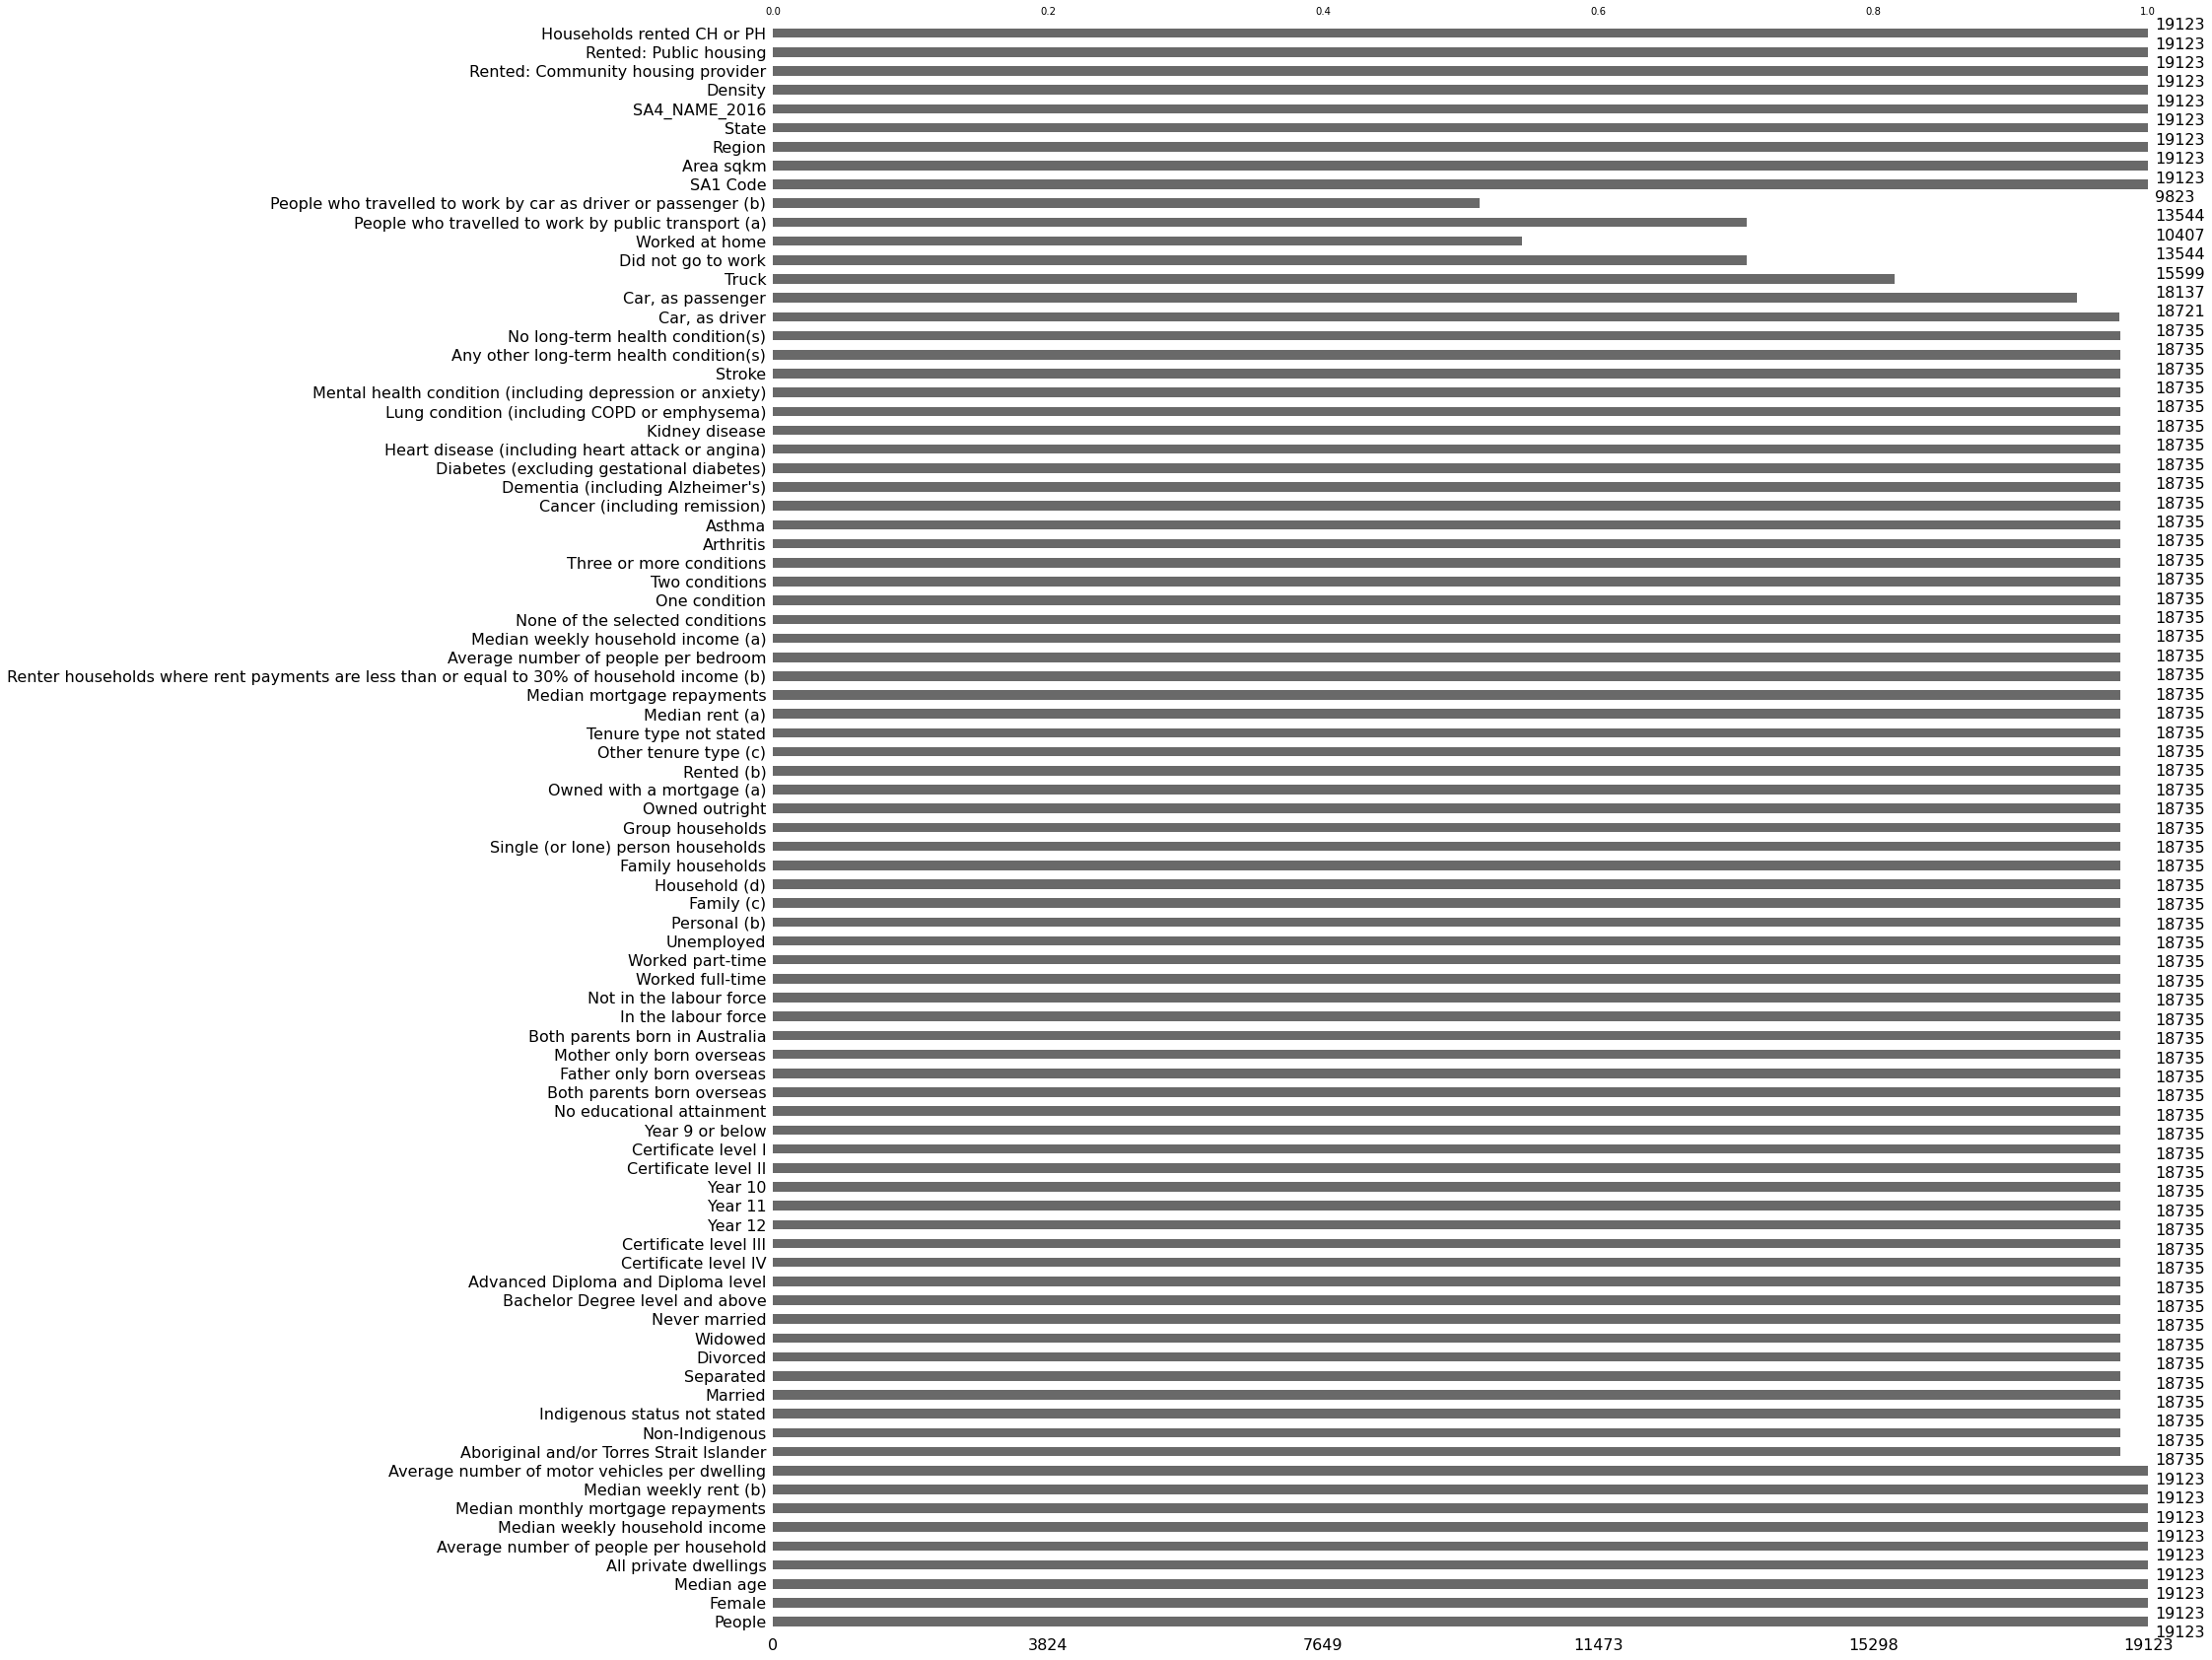

In [12]:
# Visualise na values
msno.bar(df)

### Dropping and imputing

Visually we see that "Car, as passenger" only have few observations as nans as a percentage of total

We've decided to keep those rows to have more observations for the machine learning algorithm. Only for "Car, as passenger" column our team decided to impute median or mean


In [13]:
# How many na values does "Car, as passenger" has?
print(df["Car, as passenger"].isna().sum())

# Set a threshold to select columns to drop
threshold_nas = df["Car, as passenger"].isna().sum()

986


In [14]:
# Detect columns with more null values than the set threshold
list_col_drop = []

for column in df:
  if df[column].isna().sum() > threshold_nas:
    list_col_drop.append(column)

# List with columns with more nulls than threshold
print(list_col_drop)

# Drop columns from list
df = df.drop(columns=list_col_drop, axis=1)

# Display new shape
df.shape

['Truck', 'Did not go to work', 'Worked at home', 'People who travelled to work by public transport (a)', 'People who travelled to work by car as driver or passenger (b)']


(19123, 80)

Because the feature Car, as passenger may be useful for the model instead of dropping the column or dropping the observations row-wise, we decided to impute the median for those na values.


In [15]:
# Display mean and median of "Car, as passenger" column
print(round(df["Car, as passenger"].mean(),1))
print(round(df["Car, as passenger"].median(),1))

5.4
4.6


The difference between median and mean may indicate right skewness on the variable distribution.

As next step we are plotting a histogram to check this characteristic.

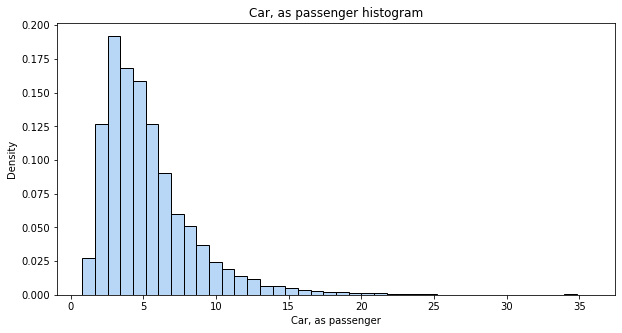

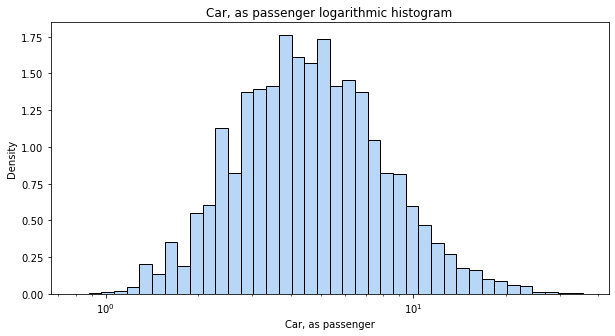

In [16]:
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))
 
# "Car, as passenger" histogram
sns.histplot(x="Car, as passenger", data=df, stat="density", ax=ax, bins=40)
plt.title("Car, as passenger histogram")
plt.show()

# "Car, as passenger" with logarithmic transformation

# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# logarithmic "Car, as passenger" histogram
sns.histplot(x="Car, as passenger", data=df, stat="density", ax=ax, bins=40, log_scale=True)
plt.title("Car, as passenger logarithmic histogram")
plt.show()



As it is right skewed we impute with median not mean.

The skeweness of this distributions would may lead us to think we should use the log of "Car, as passenger" for machine learning purposes.

AxesSubplot(0.125,0.125;0.775x0.755)


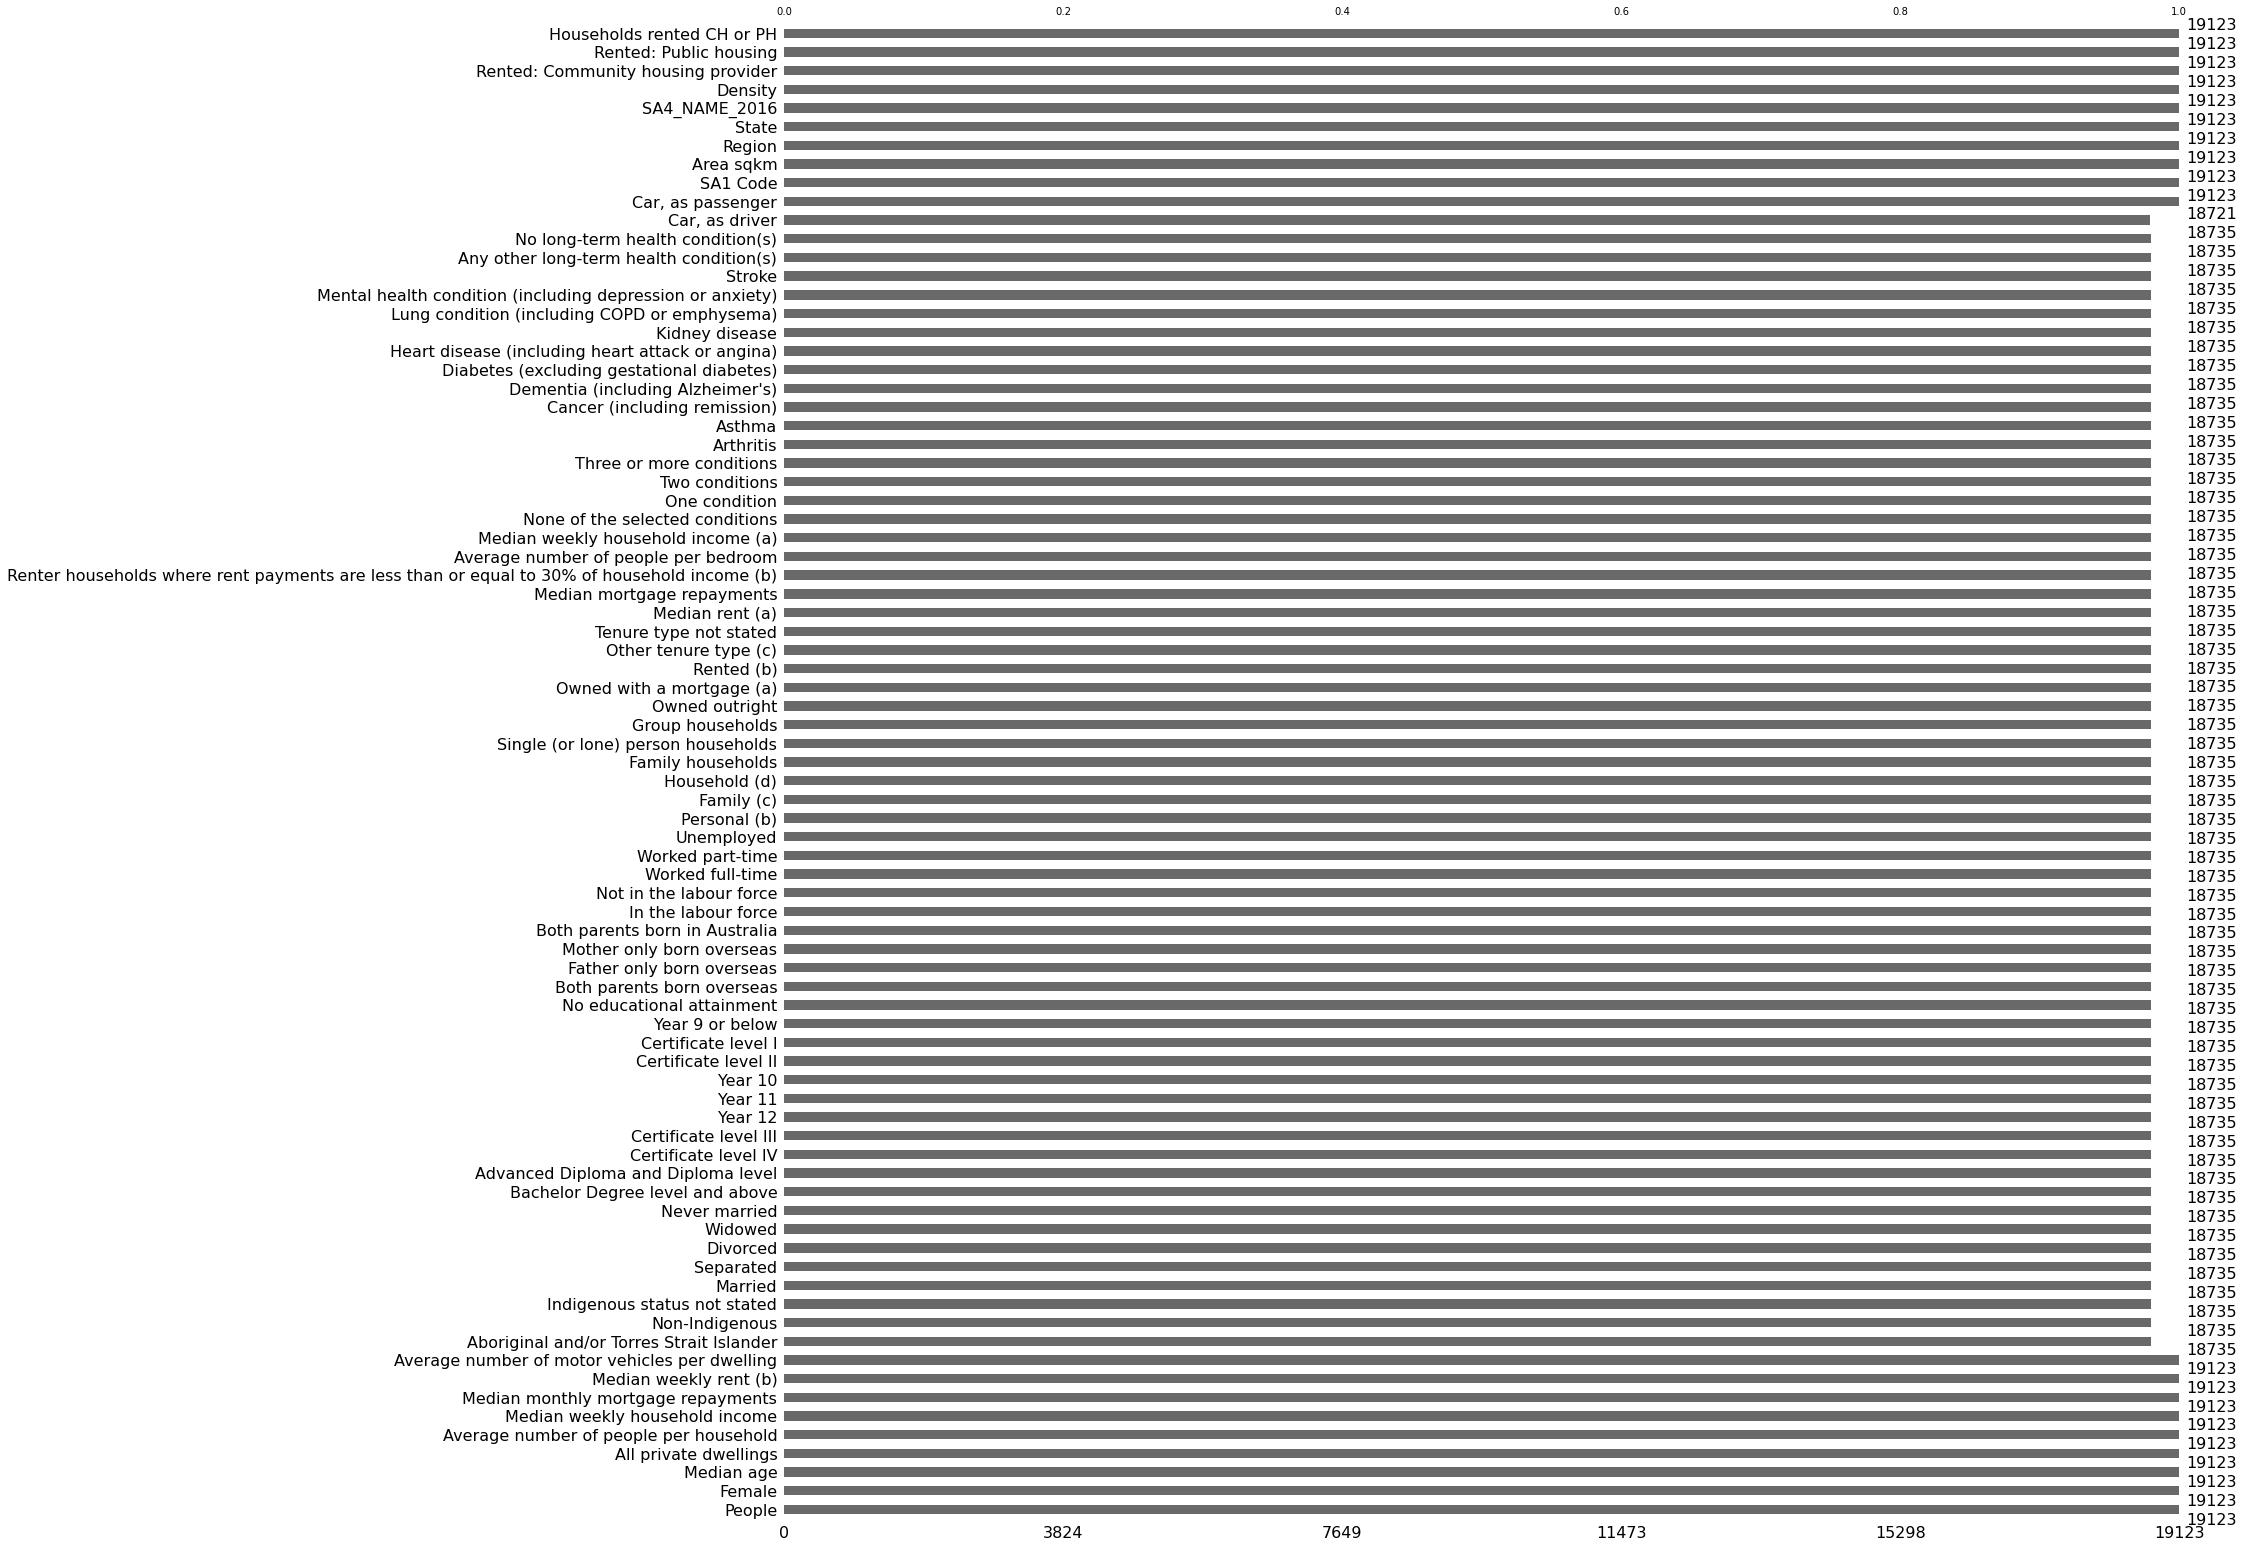

In [17]:
# Imputing "Car, as passenger" feature with its median values values
df["Car, as passenger"] = df["Car, as passenger"].fillna(df["Car, as passenger"].mean())

# Visualise na values
print(msno.bar(df))


The plot still depicts existence of null values for some observations (zones). Our dependant value is also null, therefore the decision is to drop those rows.

In [18]:
# Drop all observations that contains null Rent stress values
df = df.dropna(axis=0)



In [19]:
# Display new shape
print(df.shape)


(18721, 80)


We will be working with 18721 ABS geografical zones (SA1) in our statistical learning algorithms

AxesSubplot(0.125,0.125;0.775x0.755)


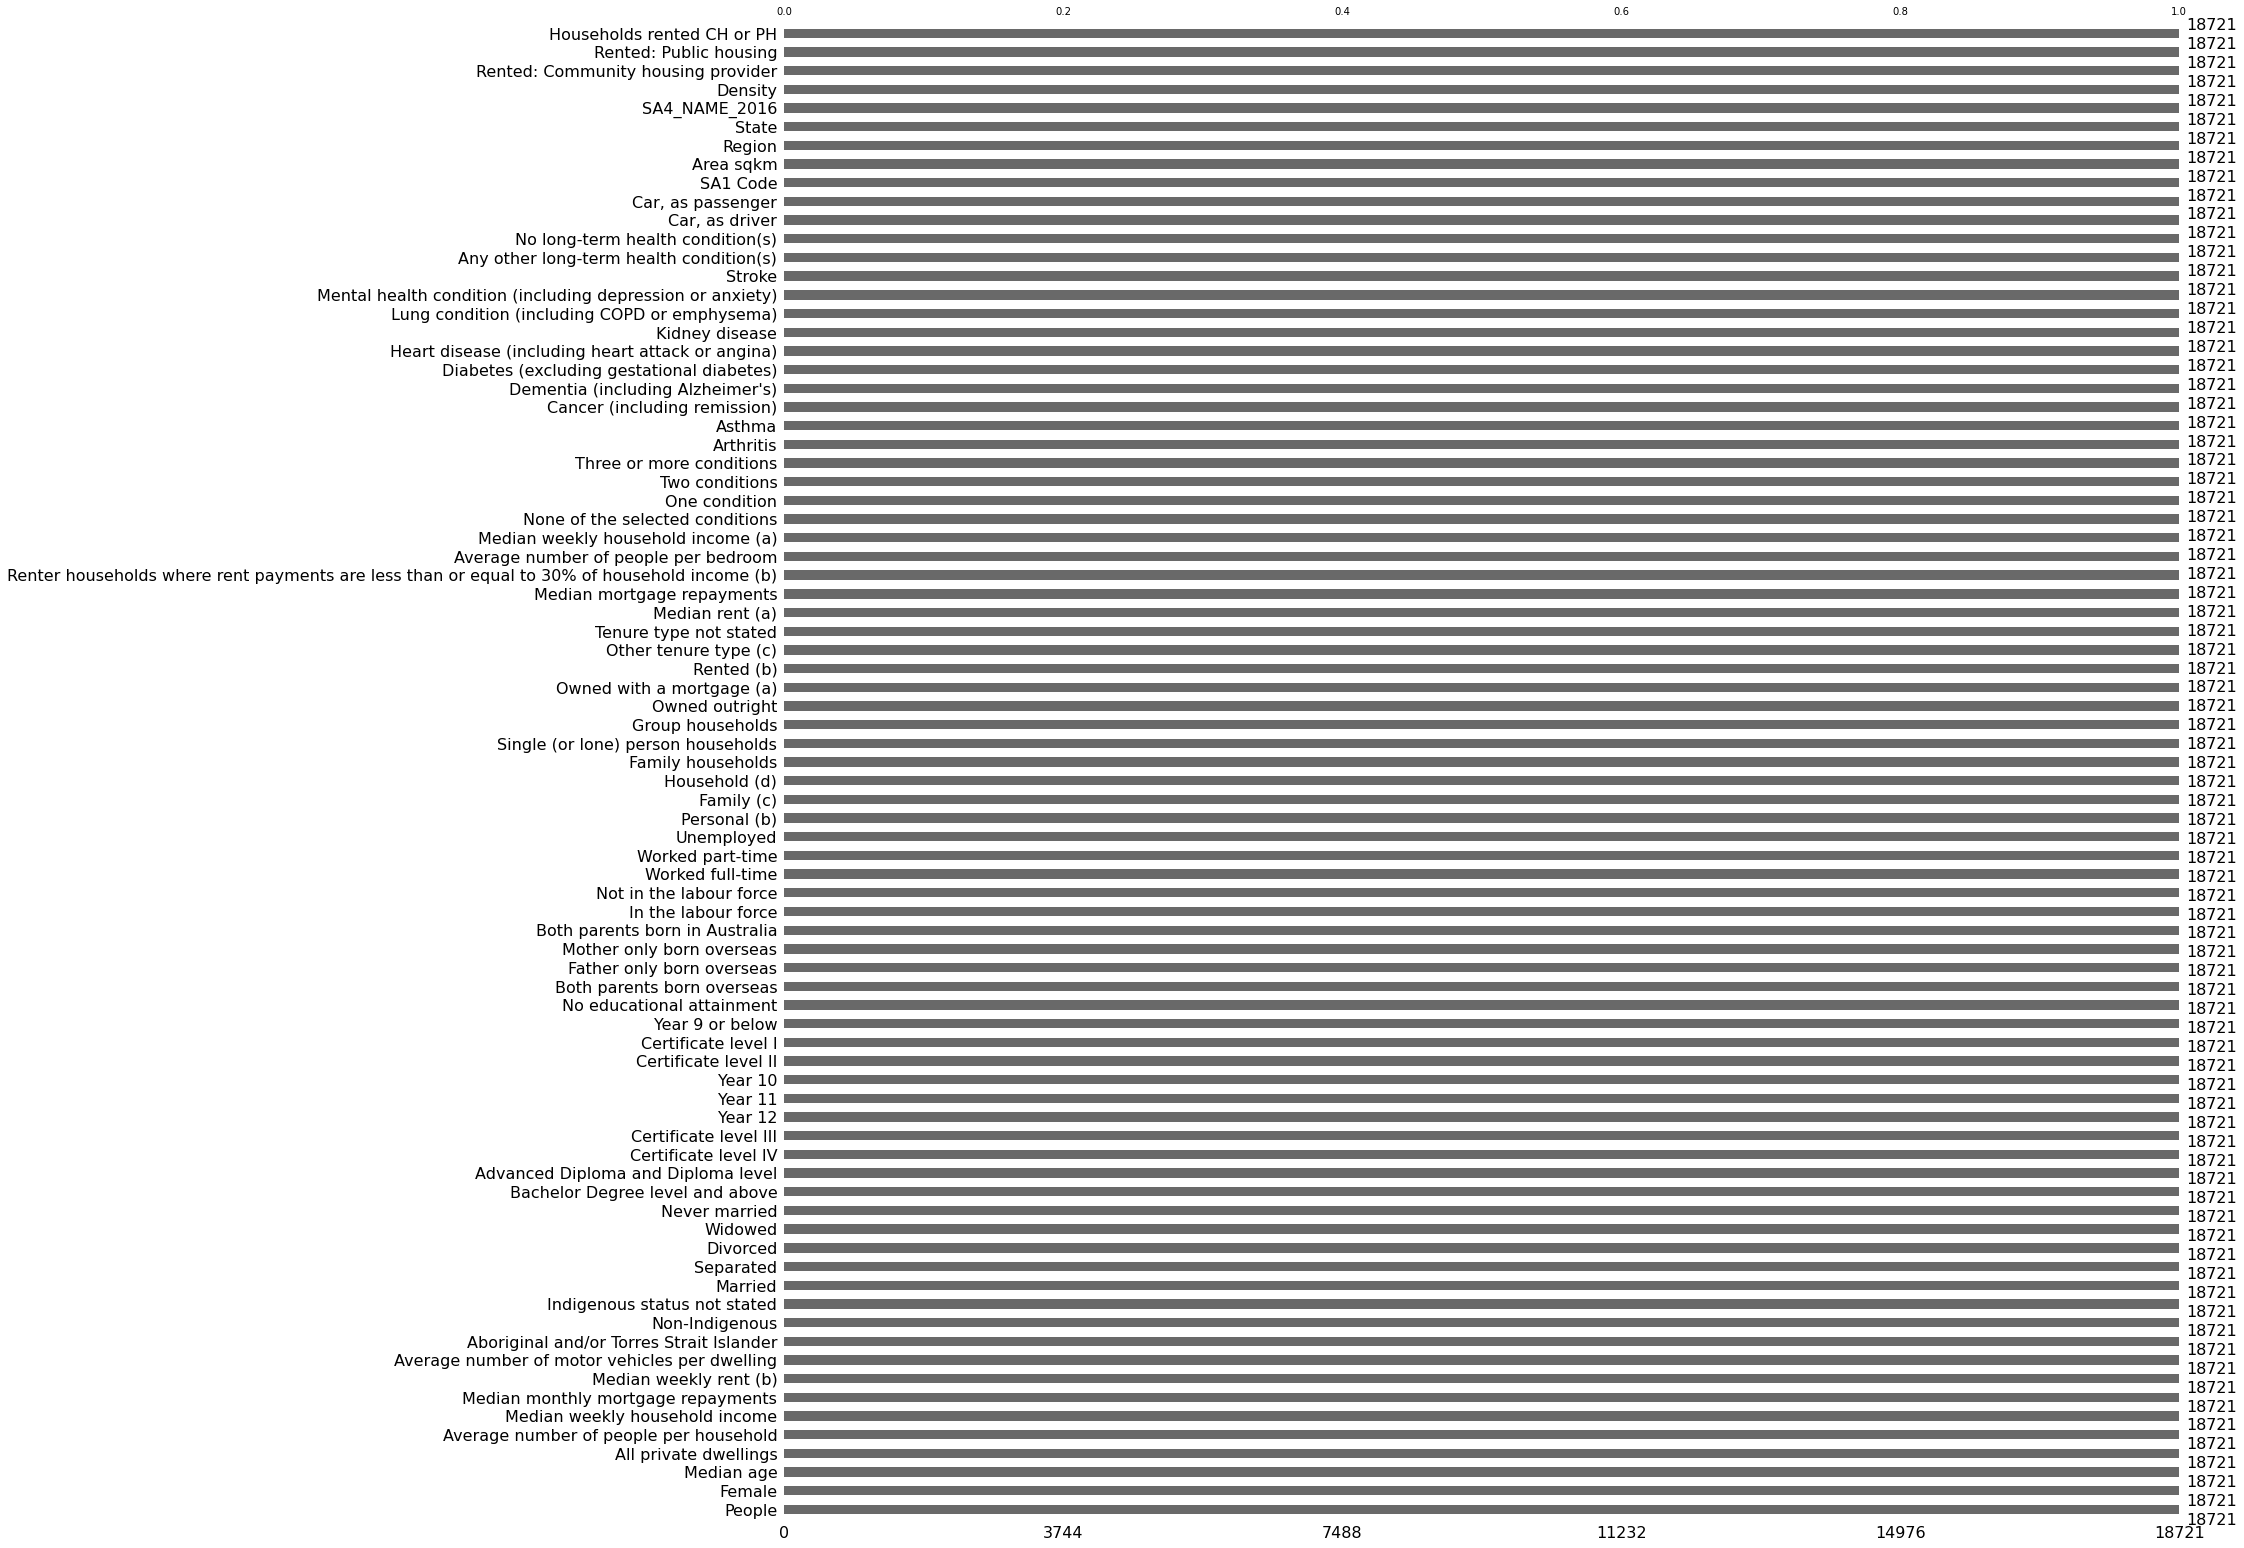

In [20]:
# Re-check all null values were handled correctly
print(msno.bar(df))

<hr>

<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Transforming the Data
<hr>

### Renaming columns

In [21]:
# Change names of the columns as all of them come from a scrapped dataset
df.columns = ['Num_people', 'Pct_female', 'Median_age', 'Num_households',
       'Avg_people_per_households', 'Median_weekly_household_income',
       'Median_monthly_mortgage_repayments',
       'Median_weekly_rent',
       'Avg_num_vehicles', 'Pct_indigenous', 'Pct_non_indigenous',
       'Pct_Non_stated_people', 'Pct_married', 'Pct_separated', 'Pct_divorced',
       'Pct_widowed', 'Pct_never_married', 'Pct_bachelor_above',
       'Pct_advanceddiploma_diploma', 'Pct_CertIV',
       'Pct_certIII', 'Year_12', 'Year_11', 'Year_10',
       'Pct_CertII', 'Pct_CertI', 'Pct_year_9_below',
       'Pct_no_educational_attainment', 'Both_parents_born_overseas',
       'Father_only_born_overseas', 'Mother_only_born_overseas',
       'Both_parents_born_ustralia', 'In_labour_force',
       'Not_in_labour_force', 'Worked_full_time', 'Worked_part_time',
       'Unemployed', 'Median_weekly_income_personal', 'Median_weekly_income_family',
       'Median_weekly_income_household', 'households_composition_family',
       'households_composition_single_lone_person',
       'households_composition_group', 'Tenure_type_owned_outright', 
       'Tenure_type_owned_mortgage',
       'Tenure_type_rented', 'Tenure_type_other', 'Tenure_type_not_stated',
       'Median_rent', 'Median_mortgage_repayments',
       'Household RAID',
       'Avg_people_per_bedroom_aboriginal',
       'Median_weekly_household_income_aboriginal', 'Health_no_condition',
       'Health_one_condition', 'Health_two_conditions', 'Health_three_more_conditions',
       'Health_Arthritis', 'Health_Asthma', 'Health_Cancer',
       'Health_Dementia',
       'Health_Diabetes',
       'Health_Heart_disease', 'Health_Kidney_disease',
       'Health_Lung', 'Health_Mental_condition', 'Health_Stroke',
       'Health_other_conditions', 'Health_no_longterm_conditions', 'Car_driver',
       'Car_passenger', 'SA1 Code', 'Area sqkm', 'Region', 'State',
       'SA4_NAME_2016', 'Density', 'Rented: Community housing provider',
       'Rented: Public housing', 'Households rented CH or PH']

### Pre-processing columns

In [22]:
# Select columns that are data type: "Object"
df.select_dtypes(include=['object']).head()

,Pct_female,Median_weekly_household_income,Median_monthly_mortgage_repayments,Median_weekly_rent,Median_weekly_income_personal,Median_weekly_income_family,Median_weekly_income_household,Region,State,SA4_NAME_2016,Rented: Public housing
0,48.5%,"$1,818","$1,517",$425,$540,"$1,884","$1,818",Greater Sydney,New South Wales,Sydney - Blacktown,0
1,55.1%,"$1,671","$1,733",$435,$676,"$2,055","$1,671",Greater Sydney,New South Wales,Sydney - Blacktown,0
2,48.9%,"$2,017","$2,000",$370,$681,"$1,781","$2,017",Greater Sydney,New South Wales,Sydney - Blacktown,0
3,61.8%,"$2,399","$2,500",$400,$590,"$2,527","$2,399",Greater Sydney,New South Wales,Sydney - Blacktown,0
4,48.6%,"$2,394","$2,392",$530,$805,"$2,250","$2,394",Greater Sydney,New South Wales,Sydney - Blacktown,0


Percentage and incomes columns have symbols in their values. The most appropiate step would be to extract those symbols and convert it into float data types.

##### Pct_female

In [23]:
# Removing % symbol and converting Pct_female to float
df["Pct_female"] = df["Pct_female"].str.replace("%","")
df['Pct_female'] = df['Pct_female'].astype(float)
print(df["Pct_female"])

0        48.5
1        55.1
2        48.9
3        61.8
4        48.6
         ... 
19118    51.6
19119    49.7
19120    46.6
19121    49.5
19122    55.6
Name: Pct_female, Length: 18721, dtype: float64


##### Income columns

In [24]:
# Detect all columns with $

list_col_dollar_sign = []

for column in df.columns:
  if df[column].dtypes == "object":
      if df[column].str.contains("\$").any():
        list_col_dollar_sign.append(column)

list_col_dollar_sign

['Median_weekly_household_income',
 'Median_monthly_mortgage_repayments',
 'Median_weekly_rent',
 'Median_weekly_income_personal',
 'Median_weekly_income_family',
 'Median_weekly_income_household']

In [25]:
# Of list_col_dollar_sign remove $, replace "," with "." and convert into float
for column in list_col_dollar_sign:
  df[column] = df[column].str.replace("$","", regex=False).str.replace(",",".", regex=False).astype(float)


In [26]:
# Check all data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18721 entries, 0 to 19122
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Num_people                                 18721 non-null  float64
 1   Pct_female                                 18721 non-null  float64
 2   Median_age                                 18721 non-null  int64  
 3   Num_households                             18721 non-null  int64  
 4   Avg_people_per_households                  18721 non-null  float64
 5   Median_weekly_household_income             18721 non-null  float64
 6   Median_monthly_mortgage_repayments         18721 non-null  float64
 7   Median_weekly_rent                         18721 non-null  float64
 8   Avg_num_vehicles                           18721 non-null  float64
 9   Pct_indigenous                             18721 non-null  float64
 10  Pct_non_indigenous    

In [27]:
# SA1 Code is the column that represents a unique identifier of each zone the proper data type would be "object"
df["SA1 Code"] = df["SA1 Code"].astype(str)


## Transforming from household quantity to percentage

Also, converting into the correct datatypes

In [28]:
# Transforming 'Rented: Community housing provider', 'Rented: Public housing' and 'Households rented CH or PH" as percentages
for column in ph.columns[1:]:
  df[column] = df[column].astype(float)
  df[column] = df[column] / df['Num_households'] * 100 

### Transforming target variable

In [29]:
# Describe the outcome variable
df["Household RAID"].describe()

count    18721.000000
mean        28.201912
std         27.361544
min          0.000000
25%         10.000000
50%         20.000000
75%         37.000000
max        552.000000
Name: Household RAID, dtype: float64

Household RAID is the target variable and it displays the number of households that are in rent stress.
therefore we will transform it into percentage of total households

In [30]:
# Make target variable as percentage of total households in each zone
df["Household RAID"] = df['Household RAID'] / df['Num_households'] * 100

# Describe our outcome variable
print("Household RAID in percentage summary statistics")
df["Household RAID"].describe()

Household RAID in percentage summary statistics


count    18721.000000
mean        14.557637
std          9.700483
min          0.000000
25%          7.228916
50%         12.376238
75%         20.080321
max         79.279279
Name: Household RAID, dtype: float64

In [31]:
# Calculate IQR
q3, q1 = np.percentile(df["Household RAID"].values, [75 ,25])
iqr = q3 - q1

print("IQR", round(iqr,2))

IQR 12.85


Although the Interquartile range is around 13%, the maximum value is 79%. This is a sign of skeweness.

<hr>

<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Range check and Summary Statistics

<hr>

In [32]:
# Run range quality check for minimum and maximum to all features that represent percentages

percentage_columns = []

for column in df.columns:
  if ("income" not in column) and ("Num" not in column) and ("Median" not in column) and (df[column].dtypes != "object"):
    percentage_columns.append(column)
    if df[column].max()>100:
      print(column, "higher than 100")
    if df[column].min()<0:
      print(column, "min than 0")


Area sqkm higher than 100
Density higher than 100


Only some features that does not represent percentages are beyond scale 0 to 100.

### Distribution of target variable

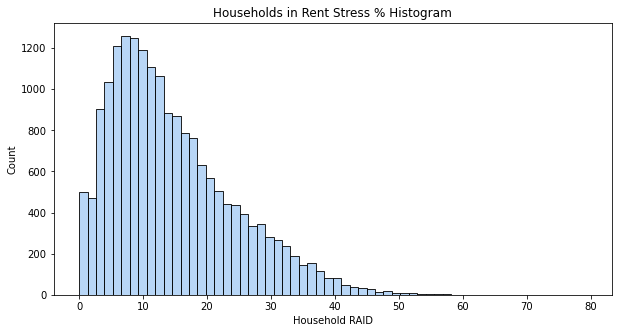

In [33]:
# How is the target variable distributed?.
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# Display histogram
sns.histplot(df['Household RAID'], bins=60, ax=ax)
plt.title("Households in Rent Stress % Histogram")
plt.show()
# The target variable is clearly skewed to the left

In [34]:
# Make a copy of the data to start working on machine learning
raid = df.copy()

# Drop 'SA1 Code'
raid = raid.drop(columns=['SA1 Code'])

In [35]:
# Select all non-numeric columns using select_dtypes
non_numeric_columns = raid.select_dtypes(exclude="number").columns.tolist()

# Print the list of non-numeric columns
print(non_numeric_columns)

['Region', 'State', 'SA4_NAME_2016']


In [36]:
# Perform one-hot encoding on the non-numeric columns
raid = pd.get_dummies(raid, columns=non_numeric_columns)

# Print the encoded dataset
raid.shape


(18721, 107)

<hr>

<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Machine Learning

<hr>

### Creation of X and y for machine learning

In [37]:
# Create numpy arrays X and y
y = raid.pop("Household RAID").values
X = raid.values

### Standardisation 

In [38]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


### Train-test split

In [39]:
# Set a seed for splitting 
random_state = 100

# Set a test size (80% train, 20% test)
test_size = 0.2

In [40]:
# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


<hr> 

<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Assess baseline performance

<hr>
<br>

This baseline model predict the mean for every observation

<br>

In [41]:
# Baseline model predictions for training
y_train_pred_baseline = np.full((len(y_train), ), y_train.mean())

# Baseline model predictions for testing
y_test_pred_baseline = np.full((len(y_test), ), y_train.mean())

# Calculate baseline train mse
mse_train_baseline = round(mean_squared_error(y_train, y_train_pred_baseline),1)

# Calculate baseline test mse
mse_test_baseline = round(mean_squared_error(y_test, y_test_pred_baseline),1)

print("Baseline train MSE:", mse_train_baseline)
print("Baseline test MSE:", mse_test_baseline)

Baseline train MSE: 94.5
Baseline test MSE: 92.5


In [42]:
# Print the root mean square errors for better interpretability
rmse_train_baseline = np.sqrt(mse_train_baseline)
rmse_test_baseline = np.sqrt(mse_test_baseline)

print("Baseline train RMSE:", rmse_train_baseline)
print("Baseline test RMSE:", rmse_test_baseline)

Baseline train RMSE: 9.72111104761179
Baseline test RMSE: 9.617692030835672


### Comparison baseline with target variable

In [43]:
mean = df['Household RAID'].mean()
median = df['Household RAID'].median()
iqr = df['Household RAID'].quantile(0.75) - df['Household RAID'].quantile(0.25)
variance = df['Household RAID'].var()
std_dev = df['Household RAID'].std()

print("Mean: {:.2f}".format(mean))
print("Median: {:.2f}".format(median))
print("IQR: {:.2f}".format(iqr))
print("Variance: {:.2f}".format(variance))
print("Standard Deviation: {:.2f}".format(std_dev))

Mean: 14.56
Median: 12.38
IQR: 12.85
Variance: 94.10
Standard Deviation: 9.70


<hr>


<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Functions for fitting, predicting and computing MSEs
<hr>

In [44]:

# Function to train a Sci-kit learn model with or without hyperparameter tuning displaying MSE and best parameters

def model_cv(model, search_type=None, hyperparameter_grid=None, tune_params=True, X_train=None, y_train=None, X_test=None, y_test=None):
    """
    Fits a machine learning model using cross-validation with either grid search or random search.
    
    Args:
    - model: a machine learning model object
    - search_type (optional): a string indicating whether to use "grid" search or "random" search
    - hyperparameter_grid (optional): a dictionary of hyperparameters to search over
    - tune_params (optional): a boolean indicating whether or not to perform hyperparameter tuning
    - X_train: the training data as a pandas DataFrame
    - y_train: the training labels as a pandas Series
    - X_test: the testing data as a pandas DataFrame
    - y_test: the testing labels as a pandas Series
    
    """
    if tune_params:
        if search_type == "grid":
            search = GridSearchCV(model, hyperparameter_grid, cv=5, n_jobs=-1)
        elif search_type == "random":
            search = RandomizedSearchCV(model, hyperparameter_grid, cv=5, n_jobs=-1)
        else:
            print("Invalid search type. Please choose 'grid' or 'random'.")
            return
        
        search.fit(X_train, y_train)
        best_params = search.best_params_
        model = search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_params = None
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    training_mse = mean_squared_error(y_train, y_train_pred)
    testing_mse = mean_squared_error(y_test, y_test_pred)
    
    print(
    " Best Parameters: ", best_params,
    ("\n"),
    ("\n"),
    "Training MSE: ", round(training_mse, 4),
    ("\n"),
    ("\n"),
    "Testing MSE: ", round(testing_mse, 4))
    


In [45]:
# Function to train a Sci-kit learn model and return train and test MSE

def model_cv_return(model, search_type=None, hyperparameter_grid=None, tune_params=True, X_train=None, y_train=None, X_test=None, y_test=None):

    if tune_params:
        if search_type == "grid":
            search = GridSearchCV(model, hyperparameter_grid, cv=5, n_jobs=-1)
        elif search_type == "random":
            search = RandomizedSearchCV(model, hyperparameter_grid, cv=5, n_jobs=-1)
        else:
            print("Invalid search type. Please choose 'grid' or 'random'.")
            return
        
        search.fit(X_train, y_train)
        best_params = search.best_params_
        model = search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_params = None
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    training_mse = mean_squared_error(y_train, y_train_pred)
    testing_mse = mean_squared_error(y_test, y_test_pred)
    
    return training_mse, testing_mse
    

<hr>


<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Linear Model & Regularised Linear Models
<hr>


### Linear Regression

In [375]:

# Fit model using the function
model_cv(model=LinearRegression(), tune_params=False, 
                                     X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)



 Best Parameters:  None 
 
 Training MSE:  9.8658 
 
 Testing MSE:  10.3781


### Lasso (L1 regularisation)

In [376]:

# Dictionary of hyperparameters
grid = {"alpha": [0.01, 0.1, 1]}


# Fit model using the function
model_cv(model=Lasso(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'alpha': 0.01} 
 
 Training MSE:  9.8666 
 
 Testing MSE:  10.2914


It would be appropriate to evaluate alpha values lower than the one that was chosen, since the selected hyperparameter alpha was already the minimum value.

As the value of alpha decreases in the Lasso regression algorithm, the amount of regularization applied to the model decreases as well. 

In [377]:

# Dictionary of hyperparameters
grid = {"alpha": [0.0001, 0.001, 0.0025, 0.005, 0.01]}


# Fit model using the function
model_cv(model=Lasso(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'alpha': 0.005} 
 
 Training MSE:  9.8419 
 
 Testing MSE:  10.2853


In [378]:
results_df

,Alpha,Training,Testing
0,0.000,9.831042,10.302794
1,0.001,9.831840,10.294432
2,0.005,9.841904,10.285287
3,0.008,9.855506,10.287194
4,0.010,9.866568,10.291432
5,0.020,9.938795,10.326076
6,0.030,10.021195,10.378273


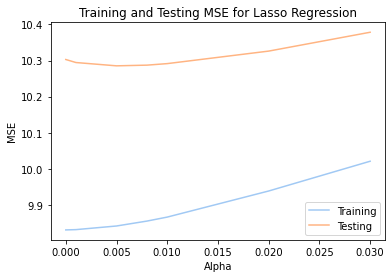

In [379]:
# Compute testing and training MSE for plotting
alpha_vals = [0, 0.001, 0.005, 0.008, 0.01, 0.02, 0.03]
testing_mse_results = []
training_mse_results = []
alpha_results = []

for alpha in alpha_vals:
    training_mse, testing_mse = model_cv_return(model=Lasso(alpha=alpha), tune_params=False, 
                                     X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
    testing_mse_results.append(testing_mse)
    training_mse_results.append(training_mse)
    alpha_results.append(alpha)

# Plot the results
results_df = pd.DataFrame({"Alpha": alpha_results, "Training": training_mse_results, "Testing": testing_mse_results})
ax = results_df[["Alpha","Training","Testing"]].plot(x="Alpha", y=["Training","Testing"])
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('Training and Testing MSE for Lasso Regression')
plt.show()


<hr>


<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Ridge (L2 regularisation)
<hr>

In [380]:

# Dictionary of hyperparameters
grid = {"alpha": [0.01, 0.1, 1]}


# Fit model using the function
model_cv(model=Ridge(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'alpha': 1} 
 
 Training MSE:  9.8311 
 
 Testing MSE:  10.3025


In [381]:

# Dictionary of hyperparameters
grid = {"alpha": [1, 2, 5, 10]}


# Fit model using the function
model_cv(model=Ridge(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'alpha': 10} 
 
 Training MSE:  9.8314 
 
 Testing MSE:  10.2978


In [382]:

# Dictionary of hyperparameters
grid = {"alpha": [10, 20, 30, 50]}


# Fit model using the function
model_cv(model=Ridge(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'alpha': 20} 
 
 Training MSE:  9.8325 
 
 Testing MSE:  10.2934


In [383]:

# Dictionary of hyperparameters
grid = {"alpha": [15, 17.5, 20, 22.5, 25]}


# Fit model using the function
model_cv(model=Ridge(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'alpha': 20} 
 
 Training MSE:  9.8325 
 
 Testing MSE:  10.2934


<hr>


<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



### Is Lasso better than Linear Regression in terms of performance?

Given that Lasso (with alpha= 0.005) had a 'testing_mse' of 10.285 and Linear Regression had 10.30, can using L1 regularization with fewer features result in significantly better performance?

In [341]:
# Function to create a pandas dataframe of test MSE result

def fit_models(X, y, model1=LinearRegression(), model2=Lasso(alpha=0.005), n=10):
    results = []
    
    for i in range(n):
        # Train/test split with random state of i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        
        for model in [model1, model2]:
            # Fit the model and make predictions
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            # Calculate the train MSE and store the result in the results list
            train_mse = round(mean_squared_error(y_test, y_pred), 3)
            results.append({'model': type(model).__name__, 'mse': train_mse, 'random_state': i})
    
    # Create a pandas dataframe from the results list
    results_df = pd.DataFrame(results)
    
    # Pivot the dataframe to show the MSE for each model and random state
    results_pivot = results_df.pivot(index='random_state', columns='model', values='mse')
    
    return results_pivot


In [385]:

# Calculate test results of models Linear regression and Lasso
linear_regression_results = fit_models(X, y, model1=LinearRegression(n_jobs=-1), model2=Lasso(alpha=0.005), n=30)

# Display first 5 results
linear_regression_results.head()


model,Lasso,LinearRegression
random_state,,
0,10.359,10.341
1,9.699,9.713
2,10.066,10.083
3,9.449,9.466
4,9.933,9.941


In [386]:

# Calculate the mean of the lasso MSE and the linear regression MSE
lasso_mean_mse = linear_regression_results['Lasso'].mean()
linear_regression_mean_mse = linear_regression_results['LinearRegression'].mean()

# Print the results
print(("\n"),"Mean Lasso MSE: ", lasso_mean_mse,
("\n"),
("\n"),
"Mean Linear Regression MSE: ", linear_regression_mean_mse)



 Mean Lasso MSE:  10.0623 
 
 Mean Linear Regression MSE:  10.076400000000003


##### Is the mean difference statistically significant?

H0: There is no difference in of test MSE mean between the models

H1: There is significant difference of test MSE mean between models

In [387]:

# Create a t-test to check if the mean of testing RMSE between the linear regression and lasso is statistically significant
t = stats.ttest_rel(linear_regression_results['Lasso'], linear_regression_results['LinearRegression'])

# Print the p-value (two-sided test)
print(("\n"), "t-test p-value: ", t.pvalue*0.5)



 t-test p-value:  0.0003413713779647204


From the above tests, the null hypothesis can be rejected which means the models performed differently from each other.

In this case, it can be said Lasso model performs better than Linear Regression model.

## Which features are the best predictors?

In [46]:

# Instantiate Lasso regression model with alpha = 0.005
lasso = Lasso(alpha=0.005)

# Fit Lasso model to training data
lasso.fit(X_train, y_train)

# Extract the best predictors
feature_names = list(raid.columns)
selected_features = pd.DataFrame({"Feature": feature_names, "Coefficient": lasso.coef_})
selected_features = selected_features[selected_features["Coefficient"] != 0]


In [48]:
# Compute absolute coefficients
selected_features["Coefficient-Abs"] = selected_features["Coefficient"].abs()

# Sort value by absolute coefficients to display the best predictors
print("\n            Top 15 features of lasso alpha=0.005")
selected_features.sort_values(by="Coefficient-Abs", ascending=False).reset_index().drop("index",axis=1).head(15)


            Top 15 features of lasso alpha=0.005


,Feature,Coefficient,Coefficient-Abs
0,Tenure_type_rented,6.453432,6.453432
1,Tenure_type_owned_mortgage,-2.368769,2.368769
2,In_labour_force,2.057658,2.057658
3,Num_households,-1.760664,1.760664
4,Tenure_type_owned_outright,-1.544346,1.544346
5,Num_people,1.522449,1.522449
6,Rented: Community housing provider,-0.874660,0.874660
7,Avg_num_vehicles,-0.713256,0.713256
8,Pct_bachelor_above,0.706351,0.706351
9,Rented: Public housing,0.702564,0.702564


### Is community housing provider an important feature? and Public housing?

#### Coefficients and P-values using Lasso

In [49]:

# Instance Lasso model
lasso = Lasso(alpha=0.005)

# Fit the Lasso model to the data
lasso.fit(X_train, y_train)

# Define the number of bootstrap samples to use
n_bootstrap = 50

# Define an empty array to store the coefficients
coeffs = np.zeros((n_bootstrap, len(raid.columns)))

# Perform the bootstrap resampling
for i in range(n_bootstrap):
    X_boot, y_boot = resample(X_train, y_train)
    lasso.fit(X_boot, y_boot)
    coeffs[i, :] = lasso.coef_

# Compute the mean and standard error of the coefficients
mean_coeffs = np.mean(coeffs, axis=0)
se_coeffs = np.std(coeffs, axis=0)

# Compute the t-statistic and p-values
t_stat = mean_coeffs / se_coeffs
p_values = 2 * (1 - norm.cdf(np.abs(t_stat)))

# Compute the confidence intervals (95% Confidence)
lower_ci = mean_coeffs - 1.96 * se_coeffs
upper_ci = mean_coeffs + 1.96 * se_coeffs

# Combine the results into a dataframe
result_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": mean_coeffs,
    "p-value": p_values,
    "Lower CI": lower_ci,
    "Upper CI": upper_ci
})

# Print the results for p-values less than 0.025
display(result_df[result_df["p-value"]<0.025])


,Feature,Coefficient,p-value,Lower CI,Upper CI
0,Num_people,1.511346,0.000000e+00,1.264470,1.758223
3,Num_households,-1.753435,0.000000e+00,-2.033596,-1.473273
4,Avg_people_per_households,-0.381355,4.651906e-04,-0.594911,-0.167798
5,Median_weekly_household_income,-0.083153,2.348909e-02,-0.155097,-0.011209
6,Median_monthly_mortgage_repayments,0.109900,6.689346e-04,0.046583,0.173216
8,Avg_num_vehicles,-0.715355,0.000000e+00,-0.866253,-0.564457
15,Pct_widowed,0.383552,2.857858e-08,0.248098,0.519007
17,Pct_bachelor_above,0.717967,8.526189e-08,0.455212,0.980722
19,Pct_CertIV,0.109055,7.491972e-03,0.029124,0.188986
21,Year_12,-0.326182,8.002544e-05,-0.488268,-0.164097


#### Coefficients and P-values using Multiple linear regression

In [392]:
# Fit OLS model to selected features
ols = sm.OLS(y, raid).fit()

# Create DataFrame with coefficients and p-values
coef_pval_df = pd.DataFrame({
    "Feature": raid.columns,
    "Coefficient": ols.params,
    "p-value": ols.pvalues,
    "CI low boundary": ols.conf_int(alpha=0.05).iloc[:,0],
    "CI high boundary": ols.conf_int(alpha=0.05).iloc[:,1]
    
})

# Print coefficient, p-value and confidence interval
coef_pval_df[coef_pval_df.Feature.str.startswith("Rented")]

,Feature,Coefficient,p-value,CI low boundary,CI high boundary
Rented: Community housing provider,Rented: Community housing provider,-0.364022,2.355736e-43,-0.415572,-0.312472
Rented: Public housing,Rented: Public housing,0.085141,6.622883e-04,0.036134,0.134148


in the case of "Rented: Community housing provider" there is a statistical significant correlation between this feature and the observed percentage of rent stress "Household RAID"

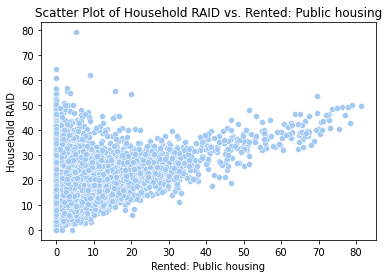

In [394]:
# Df where CHP 
df_CHP_no_null = df
# Create scatter plot using seaborn
sns.scatterplot(data=df_CHP_no_null, x="Rented: Public housing", y="Household RAID")

# Add axis labels and title
plt.ylabel("Household RAID")
plt.xlabel("Rented: Public housing")
plt.title("Scatter Plot of Household RAID vs. Rented: Public housing")
plt.show()

#### Community housing simple linear regression and plot

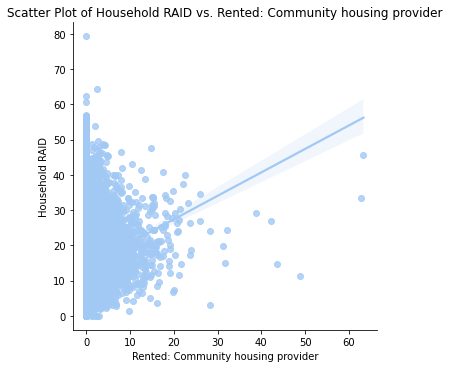

In [50]:
# Create scatter plot using seaborn with linear regression line
sns.lmplot(data=df_CHP_no_null, x="Rented: Community housing provider", y="Household RAID")

# Add axis labels and title
plt.ylabel("Household RAID")
plt.xlabel("Rented: Community housing provider")
plt.title("Scatter Plot of Household RAID vs. Rented: Community housing provider")

# Display the plot
plt.show()

In [51]:

# Fit the linear regression model
X = df_CHP_no_null["Rented: Community housing provider"]
y = df_CHP_no_null["Household RAID"]
X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()

# Get the coefficient and intercept
coefficient = model.params[1]
intercept = model.params[0]

# Print the formula, coefficient, and intercept
print(f"Formula: Household RAID = {coefficient:.2f} * Rented: Community housing provider + {intercept:.2f}")
print(f"Coefficient: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")

Formula: Household RAID = 0.66 * Rented: Community housing provider + 14.11
Coefficient: 0.66
Intercept: 14.11



<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## KNN
<hr>

In [62]:

# Dictionary of hyperparameters
grid = {"n_neighbors": [3, 5, 7]}


# Fit model using the function
model_cv(model=KNeighborsRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'n_neighbors': 7} 
 
 Training MSE:  14.3747 
 
 Testing MSE:  18.9776


The difference between training and testing MSE might show overfitting. It would be appropiate choosing a higher number of n_neighbors to reduce it.

In [63]:

# Dictionary of hyperparameters
grid = {"n_neighbors": [7, 9, 11]}


# Fit model using the function
model_cv(model=KNeighborsRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'n_neighbors': 7} 
 
 Training MSE:  14.3747 
 
 Testing MSE:  18.9776


### Hyperparameter tuning on KNN

In [64]:

# Dictionary of hyperparameters
grid = {"n_neighbors": [7, 9, 11],
        "metric": ["euclidean", "manhattan"]}


# Fit model using the function
model_cv(model=KNeighborsRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 9} 
 
 Training MSE:  13.9378 
 
 Testing MSE:  17.436


### Results vs model flexibility

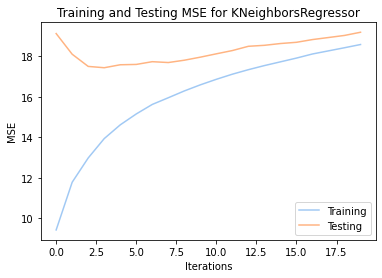

In [65]:
# Compute testing and training MSE for plotting
k=3
testing_mse_results = []
training_mse_results = []
k_results= []

for iteration in range(20):
    training_mse, testing_mse = model_cv_return(model=KNeighborsRegressor(metric= 'manhattan',n_neighbors=k),tune_params=False, 
                                     X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
    testing_mse_results.append(testing_mse)
    training_mse_results.append(training_mse)
    k_results.append(k)
    # Add k+2 for next iteration
    k+=2
    
# Plot the results 
results_df = pd.DataFrame({"K":k_results,"Training": training_mse_results, "Testing": testing_mse_results})
ax = results_df[["Training","Testing"]].plot()
ax.set_xlabel('Iterations')
ax.set_ylabel('MSE')
ax.set_title('Training and Testing MSE for KNeighborsRegressor')
plt.show()

In [66]:
# Which K got the best training results?

results_df.sort_values(by="Testing").iloc[0,:]

K            9.000000
Training    13.937817
Testing     17.436036
Name: 3, dtype: float64

Knn is performing poorly compared to Lasso even with hyperparameter tuning


<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Random Forest Regression
<hr>

In [70]:
# Dictionary of hyperparameters for RandomForestRegressor
grid = {"n_estimators": [200],
        "max_depth": [None, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_leaf": [10, 20]}

# Fit model using the function
model_cv(model=RandomForestRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 200} 
 
 Training MSE:  4.7993 
 
 Testing MSE:  9.9781


The models is performing similar to Lasso, however it shows overfitting signs.

In [71]:
# Dictionary of hyperparameters for RandomForestRegressor
grid = {"n_estimators": [200],
        "max_depth": [20],
        "max_features": ["auto"],
        "min_samples_leaf": [10, 20]}

# Fit model using the function
model_cv(model=RandomForestRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 200} 
 
 Training MSE:  4.8055 
 
 Testing MSE:  9.968


In [72]:
# Dictionary of hyperparameters for RandomForestRegressor
grid = {"n_estimators": [200],
        "max_depth": [15],
        "max_features": ["auto"],
        "min_samples_leaf": [40]}

# Fit model using the function
model_cv(model=RandomForestRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 40, 'n_estimators': 200} 
 
 Training MSE:  8.722 
 
 Testing MSE:  10.8794


In [73]:
# Dictionary of hyperparameters for RandomForestRegressor, with reduced overfitting
grid = {"n_estimators": [200],
        "max_depth": [5, 10],
        "max_features": ["auto"],
        "min_samples_split": [30, 40],
        "min_samples_leaf": [10, 20]}

# Fit model using the function
model_cv(model=RandomForestRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 200} 
 
 Training MSE:  6.4972 
 
 Testing MSE:  10.1994


In [76]:
# Dictionary of hyperparameters for RandomForestRegressor, with reduced overfitting
grid = {"n_estimators": [300],
        "max_depth": [5, 10, None],
        "max_features": ["auto"],
        "min_samples_split": [30, 40],
        "min_samples_leaf": [10, 20]}

# Fit model using the function
model_cv(model=RandomForestRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 300} 
 
 Training MSE:  5.5322 
 
 Testing MSE:  10.0453


In [74]:
# Dictionary of hyperparameters for RandomForestRegressor, with reduced overfitting
grid = {"n_estimators": [500],
        "max_depth": [20],
        "max_features": ["auto"],
        "min_samples_split": [30, 40],
        "min_samples_leaf": [10, 20]}

# Fit model using the function
model_cv(model=RandomForestRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Best Parameters:  {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 500} 
 
 Training MSE:  5.541 
 
 Testing MSE:  10.0651


<hr>

### Is Random Forest better than Lasso?

H0: There is no difference in of test MSE mean between the models

H1: There is significant difference of test MSE mean between models

In [76]:

# Calculate test results of models Lasso and KNN
comparison_results = fit_models(X, y, model1=RandomForestRegressor(max_depth= 20, max_features= 'auto', min_samples_leaf= 10, n_estimators= 200), model2=Lasso(alpha=0.005), n=10)

# Display first 5 results
comparison_results.head()


model,Lasso,RandomForestRegressor
random_state,,
0,10.359,10.352
1,9.699,9.615
2,10.066,9.685
3,9.449,9.242
4,9.933,9.721


In [78]:

# Calculate the mean of each of the models
lasso_mean_mse = comparison_results['Lasso'].mean()
Random_Forest_mean_mse = comparison_results['RandomForestRegressor'].mean()

# Print the results
print(("\n"),"Mean Lasso MSE: ", round(lasso_mean_mse,4),
("\n"),
("\n"),
"Random Forest MSE: ", round(Random_Forest_mean_mse,4))



 Mean Lasso MSE:  9.9673 
 
 Random Forest MSE:  9.7087


In [81]:

# Create a t-test to check if the mean of testing RMSE between the models is statistically significant
t = stats.ttest_rel(comparison_results['Lasso'], comparison_results['RandomForestRegressor'])

# Print the p-value (two-sided test)
print(("\n"), "t-test p-value: ", t.pvalue*0.5)



 t-test p-value:  0.002148531643802524


The mean squared error (MSE) was calculated for two regression models, Lasso and Random Forest, and found to be 9.9673 and 9.7087, respectively. Based on a statistical hypothesis test, it was concluded that the null hypothesis, which states that the two models perform similarly, should be rejected. This implies that the models do perform differently. The Random Forest model had a lower MSE, indicating that it performed better in predicting the target variable than the Lasso model in the context of this particular problem

### Feature importance for Random Forest Regressor

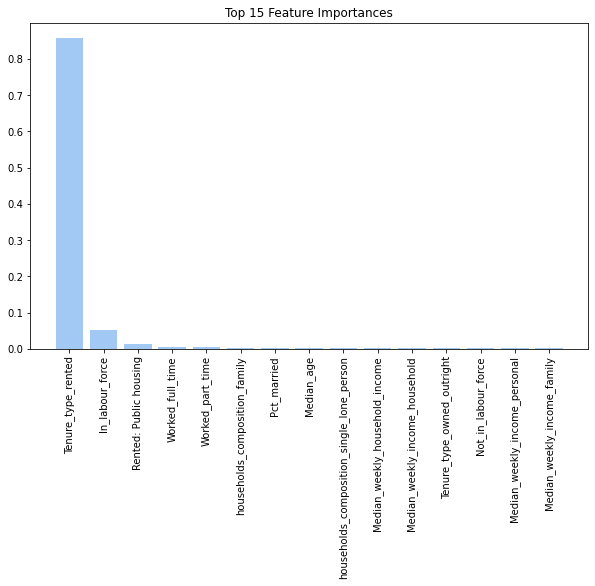

In [72]:

# Train the random forest model
rf = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=10, n_estimators=200)
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Get the indices of the top 15 features
indices = importances.argsort()[::-1][:15]

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), raid.columns[indices], rotation=90)
plt.show()


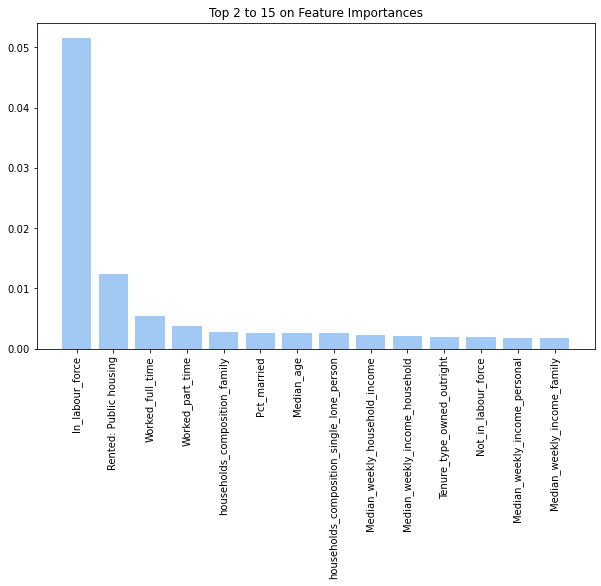

In [75]:
# Get the indices of the top 15 features **except Tenure_type_rented**
indices = importances.argsort()[::-1][1:15]

# Plot the feature importances for the top 15 features **except Tenure_type_rented**
plt.figure(figsize=(10, 6))
plt.title("Top 2 to 15 on Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), raid.columns[indices], rotation=90)
plt.show()


<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>




## XGBRegressor
<hr>

In [143]:
# Dictionary of hyperparameters for XGBRegressor
grid = {"n_estimators": [200],
        "max_depth": [None, 1, 3, 5, 7, 9],
        "learning_rate": [0.01, 0.1, 0.5, 1],
        "subsample": [0.5, 0.75, 1],
        "min_child_weight": [1, 2, 4]}

# Fit model using the function
results_XGB = model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Print the results
results_XGB

 Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 200, 'subsample': 0.75} 
 
 Training MSE:  4 
 
 Testing MSE:  9


In [147]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting
grid = {"n_estimators": [250],
        "max_depth": [7, 9],
        "learning_rate": [0.1],
        "subsample": [0.5, 0.75, 0.9],
        "gamma": [0.01, 0.1, 1]}

# Fit model using the function
results_XGB = model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Print the results
results_XGB

 Best Parameters:  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.9} 
 
 Training MSE:  1 
 
 Testing MSE:  9


In [46]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting
grid = {"n_estimators": [300],
        "max_depth": [4, 5],
        "learning_rate": [0.1],
        "subsample": [0.5, 0.75],
        "gamma": [0.2, 0.5, 1]}

# Fit model using the function
results_XGB = model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Print the results
results_XGB

 Best Parameters:  {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.75} 
 
 Training MSE:  3.2642 
 
 Testing MSE:  8.3939


In [154]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting
grid = {"n_estimators": [500],
        "max_depth": [4, 5],
        "learning_rate": [0.1],
        "subsample": [0.5, 0.6],
        "gamma": [0.3, 0.5]}

# Fit model using the function
results_XGB = model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Print the results
results_XGB

 Best Parameters:  {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.6} 
 
 Training MSE:  3.6682 
 
 Testing MSE:  8.3209


In [153]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [500],
        "max_depth": [4, 5],
        "learning_rate": [0.1],
        "subsample": [0.5, 0.6],
        "gamma": [0.4]}

# Fit model using the function
results_XGB = model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Print the results
results_XGB

 Best Parameters:  {'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.6} 
 
 Training MSE:  3.706 
 
 Testing MSE:  8.3008


In [155]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [500],
        "max_depth": [4, 5],
        "learning_rate": [0.1],
        "subsample": [0.5, 0.6],
        "gamma": [0.7]}

# Fit model using the function
results_XGB = model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Print the results
results_XGB

 Best Parameters:  {'gamma': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.6} 
 
 Training MSE:  3.6661 
 
 Testing MSE:  8.3308


### Feature Importances on XGBoosting

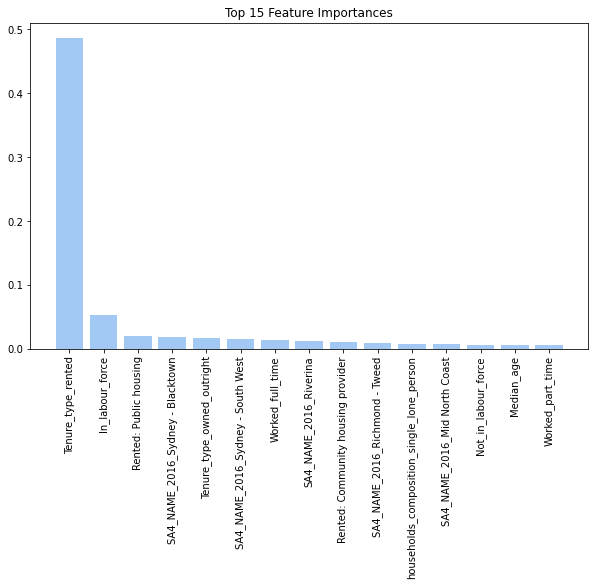

In [97]:

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=500, max_depth=5, learning_rate=0.1, subsample=0.5, gamma=0.4)
xgb_model.fit(X, y)

# Get the feature importances
importances = xgb_model.feature_importances_

# Get the indices of the top 15 features
indices = np.argsort(importances)[::-1][:15]

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), raid.columns[indices], rotation=90)
plt.show()


In [110]:
#  top 15 predictors and their importances as a dataframe
top_15_predictors = pd.DataFrame({'Feature': raid.columns[indices], 'Importance': importances[indices]})

# Add a title to the DataFrame
print("\n", "Top 15 Predictors and Their Importances","\n", "               XGBoosting")

# Display the top 15 predictors
display(top_15_predictors)


 Top 15 Predictors and Their Importances 
                XGBoosting


,Feature,Importance
0,Tenure_type_rented,0.486000
1,In_labour_force,0.052653
2,Rented: Public housing,0.020718
3,SA4_NAME_2016_Sydney - Blacktown,0.018143
4,Tenure_type_owned_outright,0.016491
5,SA4_NAME_2016_Sydney - South West,0.015919
6,Worked_full_time,0.013493
7,SA4_NAME_2016_Riverina,0.011977
8,Rented: Community housing provider,0.011334
9,SA4_NAME_2016_Richmond - Tweed,0.008825


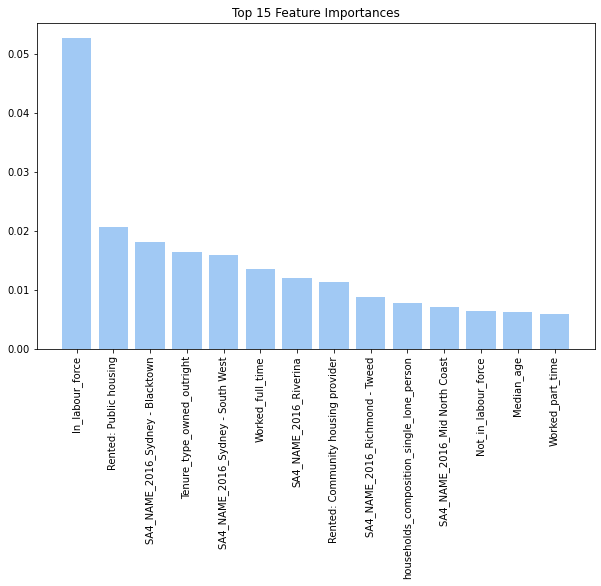

In [85]:

# Get the indices of the top 15 features
indices = np.argsort(importances)[::-1][1:15]

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), raid.columns[indices], rotation=90)
plt.show()


### Is GXBoosting better than Random Forest?

H0: There is no difference in of test MSE mean between the models

H1: There is significant difference of test MSE mean between models

In [48]:

# Calculate test results of the models
comparison_results = fit_models(X, y, model1=RandomForestRegressor(max_depth= 20, max_features= 'auto', min_samples_leaf= 10, n_estimators= 200),
                                model2=XGBRegressor(n_estimators= 500, max_depth= 4, learning_rate= 0.1,
                                             subsample= 0.6, gamma= 0.4), n=10)

# Display first 5 results
comparison_results.head()


model,RandomForestRegressor,XGBRegressor
random_state,,
0,10.346,8.400
1,9.636,8.144
2,9.716,8.200
3,9.204,7.826
4,9.711,8.131


In [51]:

# Calculate the mean of each of the models
XGB_mean_mse = comparison_results['XGBRegressor'].mean()
Random_Forest_mean_mse = comparison_results['RandomForestRegressor'].mean()

# Print the results
print(("\n"),"Mean XGBRegressor MSE: ", round(XGB_mean_mse,4),
("\n"),
("\n"),
"Random Forest MSE: ", round(Random_Forest_mean_mse,4))



 Mean XGBRegressor MSE:  8.0934 
 
 Random Forest MSE:  9.7081


In [50]:
# Create a t-test to check if the mean of testing RMSE between the models is statistically significant
t = stats.ttest_rel(comparison_results['XGBRegressor'], comparison_results['RandomForestRegressor'])

# Print the p-value (two-sided test)
print(("\n"), "t-test p-value: ", t.pvalue*0.5)



 t-test p-value:  3.687125894943304e-10


XGBRegressor performed much better than random forest. However, even with hyperparameter tuning the overfitting could not be overcome.

To reduce overfitting feature engineering and feeature selection will be made to improve XGB Regressor.


<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



## Feature Engineering

In [112]:

# Cost of living estimation from https://www.numbeo.com/cost-of-living/in/Sydney 
Cost_of_living = 1726.80 / 4

# Creationg of personal spending capacity after rent
df["Personal_spending_capacity_rent"] = df["Median_weekly_income_personal"] - df["Median_weekly_rent"] - Cost_of_living

# Creation of household spending capacity after rent
df["Household_spending_capacity_rent"] = df["Median_weekly_household_income"] - df["Median_weekly_rent"] - Cost_of_living * df["Avg_people_per_households"]

# Creation of household spending capacity after mortgage
df["Spending Capacity mortgage"] = df["Median_weekly_household_income"] - df["Median_monthly_mortgage_repayments"] / 4 - Cost_of_living * df["Avg_people_per_households"]


## Feature Selection

### Drop correlated features

In [113]:
corr_df = raid.corr()
corr_pairs = []
for i in range(len(corr_df.columns)):
    for j in range(i):
        if abs(corr_df.iloc[i, j]) > 0.85:
            corr_pairs.append((corr_df.columns[i], corr_df.columns[j]))
corr_pairs

[('Both_parents_born_ustralia', 'Both_parents_born_overseas'),
 ('Not_in_labour_force', 'In_labour_force'),
 ('Median_weekly_income_household', 'Median_weekly_household_income'),
 ('households_composition_family', 'Avg_people_per_households'),
 ('households_composition_single_lone_person', 'Avg_people_per_households'),
 ('households_composition_single_lone_person',
  'households_composition_family'),
 ('Health_no_longterm_conditions', 'Health_no_condition'),
 ('Households rented CH or PH', 'Rented: Public housing'),
 ('Region_Rest of NSW', 'Region_Greater Sydney')]

In [114]:
for features in corr_pairs:
    print(features[0])
    if features[0] in raid.columns:
        raid = raid.drop(features[0],axis=1)

Both_parents_born_ustralia
Not_in_labour_force
Median_weekly_income_household
households_composition_family
households_composition_single_lone_person
households_composition_single_lone_person
Health_no_longterm_conditions
Households rented CH or PH
Region_Rest of NSW


In [115]:
# Regular expression pattern to match
pattern = '^(?!Region_|State_|SA4_)'

# Use the filter method to select only the columns that match the pattern
selected_cols = raid.filter(regex=pattern)

# Use the drop method to drop all other columns
raid = raid.drop(columns=set(raid.columns) - set(selected_cols.columns))


In [116]:
# New X
X_new = raid.values

In [117]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)


In [118]:
# Split the data into training and test sets with stratification
X_train_n, X_test_n, y_train, y_test = train_test_split(X_new, y, test_size=test_size, random_state=random_state)


## GXBRegressor after feature engineering and selection

In [402]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [500],
        "max_depth": [4],
        "learning_rate": [0.1],
        "subsample": [0.6],
        "gamma": [0.4]}

# Fit model using the function
model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)


 Best Parameters:  {'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.6} 
 
 Training MSE:  3.8126 
 
 Testing MSE:  8.4705


In [403]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [300],
        "max_depth": [4,None],
        "learning_rate": [0.1],
        "subsample": [0.6],
        "gamma": [0.4]}

# Fit model using the function
model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)


 Best Parameters:  {'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.6} 
 
 Training MSE:  4.986 
 
 Testing MSE:  8.5657


In [404]:
# Dictionary of hyperparameters for XGBRegressor
grid = {"n_estimators": [200],
        "max_depth": [9],
        "learning_rate": [0.01, 0.5],
        "subsample": [0.5, 0.75]}

# Fit model using the function
model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)


 Best Parameters:  {'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.75} 
 
 Training MSE:  0.0 
 
 Testing MSE:  13.2902


In [405]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [300],
        "max_depth": [4, 6],
        "learning_rate": [0.1],
        "subsample": [0.6],
        "gamma": [0.4]}

# Fit model using the function
model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)


 Best Parameters:  {'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.6} 
 
 Training MSE:  4.986 
 
 Testing MSE:  8.5657


In [406]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [300],
        "max_depth": [4, 6],
        "learning_rate": [0.1],
        "subsample": [0.6],
        "gamma": [0.1]}

# Fit model using the function
model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)


 Best Parameters:  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.6} 
 
 Training MSE:  5.0085 
 
 Testing MSE:  8.5169


In [407]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [300],
        "max_depth": [4, 6],
        "learning_rate": [0.05],
        "subsample": [0.6],
        "gamma": [0.1]}

# Fit model using the function
model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)


 Best Parameters:  {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6} 
 
 Training MSE:  3.5257 
 
 Testing MSE:  8.5194


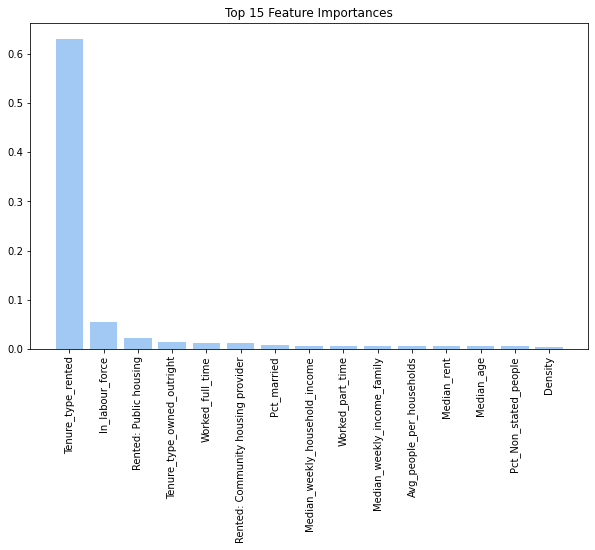

In [119]:

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.6, gamma=0.1)
xgb_model.fit(X_new, y)

# Get the feature importances
importances = xgb_model.feature_importances_

# Get the indices of the top 15 features
indices = np.argsort(importances)[::-1][:15]

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), raid.columns[indices], rotation=90)
plt.show()


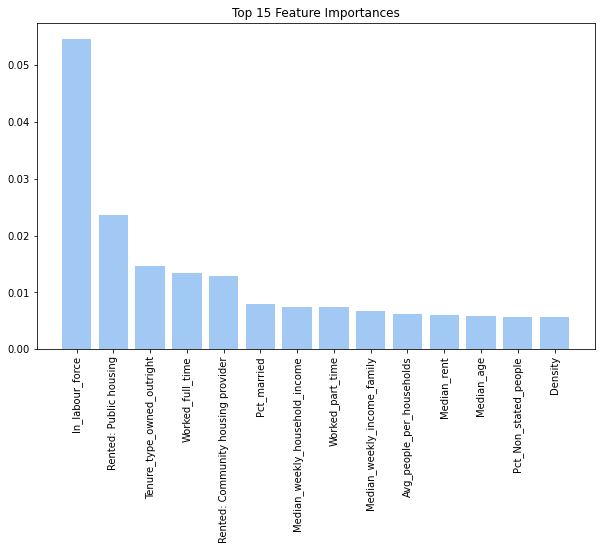

In [409]:

# Get the indices of the top 15 features
indices = np.argsort(importances)[::-1][1:15]

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), raid.columns[indices], rotation=90)
plt.show()


In [122]:
#  top 15 predictors and their importances as a dataframe
top_15_predictors = pd.DataFrame({'Feature': raid.columns[indices], 'Importance': importances[indices]})

# Add a title to the DataFrame
print("\n", "Top 15 Predictors and Their Importances","\n", "   XGBoosting after feature selection")

# Display the top 15 predictors
display(top_15_predictors)


 Top 15 Predictors and Their Importances 
    XGBoosting after feature selection


,Feature,Importance
0,Tenure_type_rented,0.630362
1,In_labour_force,0.054663
2,Rented: Public housing,0.023674
3,Tenure_type_owned_outright,0.014676
4,Worked_full_time,0.013507
5,Rented: Community housing provider,0.012948
6,Pct_married,0.008019
7,Median_weekly_household_income,0.007509
8,Worked_part_time,0.007445
9,Median_weekly_income_family,0.006780


## Best feature in Lasso after feature engineering and feature selection

In [177]:

# Lasso prediction power
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"alpha": [0.005]}

# Fit model using the function
model_cv(model=Lasso(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)


 Best Parameters:  {'alpha': 0.005} 
 
 Training MSE:  10.1214 
 
 Testing MSE:  10.5568


In [178]:

# Instantiate Lasso regression model with alpha = 0.005
lasso = Lasso(alpha=0.005)

# Fit Lasso model to training data
lasso.fit(X_train_n, y_train)

# Extract the best predictors
feature_names = list(raid.columns)
selected_features = pd.DataFrame({"Feature": feature_names, "Coefficient": lasso.coef_})
selected_features = selected_features[selected_features["Coefficient"] != 0]
# Compute absolute coefficients
selected_features["Coefficient-Abs"] = selected_features["Coefficient"].abs()

# Sort value by absolute coefficients to display the best predictors
print("\n            Top 15 features of lasso alpha=0.005")
selected_features.sort_values(by="Coefficient-Abs", ascending=False).reset_index().drop("index",axis=1).head(15)


            Top 15 features of lasso alpha=0.005


,Feature,Coefficient,Coefficient-Abs
0,Tenure_type_rented,6.466363,6.466363
1,In_labour_force,2.358049,2.358049
2,Tenure_type_owned_mortgage,-2.303934,2.303934
3,Num_households,-1.913889,1.913889
4,Num_people,1.639302,1.639302
5,Tenure_type_owned_outright,-1.604964,1.604964
6,Rented: Community housing provider,-0.929996,0.929996
7,Both_parents_born_overseas,0.895753,0.895753
8,Rented: Public housing,0.725890,0.725890
9,Worked_full_time,0.639698,0.639698


## Lasso without Tenure Type Rented


In [123]:
# Regular expression pattern to match
pattern = '^(?!Region_|State_|SA4_|Tenure_type_rented)'

# Use the filter method to select only the columns that match the pattern
selected_cols = raid.filter(regex=pattern)

# Use the drop method to drop all other columns
raid = raid.drop(columns=set(raid.columns) - set(selected_cols.columns))

# New X
X_new = raid.values

# Scale the data using StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

# Split the data into training and test sets with stratification
X_train_r, X_test_r, y_train, y_test = train_test_split(X_new, y, test_size=test_size, random_state=random_state)


In [58]:

# Lasso prediction power
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"alpha": [0.005]}

# Fit model using the function
model_cv(model=Lasso(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_r, y_train=y_train, X_test=X_test_r, y_test=y_test)


 Best Parameters:  {'alpha': 0.005} 
 
 Training MSE:  11.329 
 
 Testing MSE:  11.7443


In [66]:

# Instantiate Lasso regression model with alpha = 0.005
lasso = Lasso(alpha=0.005)

# Fit Lasso model to training data
lasso.fit(X_train_r, y_train)

# Extract the best predictors
feature_names = list(raid.columns)
selected_features = pd.DataFrame({"Feature": feature_names, "Coefficient": lasso.coef_})
selected_features = selected_features[selected_features["Coefficient"] != 0]
# Compute absolute coefficients
selected_features["Coefficient-Abs"] = selected_features["Coefficient"].abs()

# Sort value by absolute coefficients to display the best predictors
print("\n   Top 15 features of lasso after feature selection")
selected_features.sort_values(by="Coefficient-Abs", ascending=False).reset_index().drop("index",axis=1).head(15)


   Top 15 features of lasso after feature selection


,Feature,Coefficient,Coefficient-Abs
0,Tenure_type_owned_mortgage,-6.298510,6.298510
1,Tenure_type_owned_outright,-5.696796,5.696796
2,In_labour_force,2.425985,2.425985
3,Num_households,-1.813931,1.813931
4,Num_people,1.601826,1.601826
5,Tenure_type_other,-1.478550,1.478550
6,Both_parents_born_overseas,1.125036,1.125036
7,Rented: Public housing,0.929660,0.929660
8,Rented: Community housing provider,-0.857587,0.857587
9,Avg_num_vehicles,-0.811043,0.811043


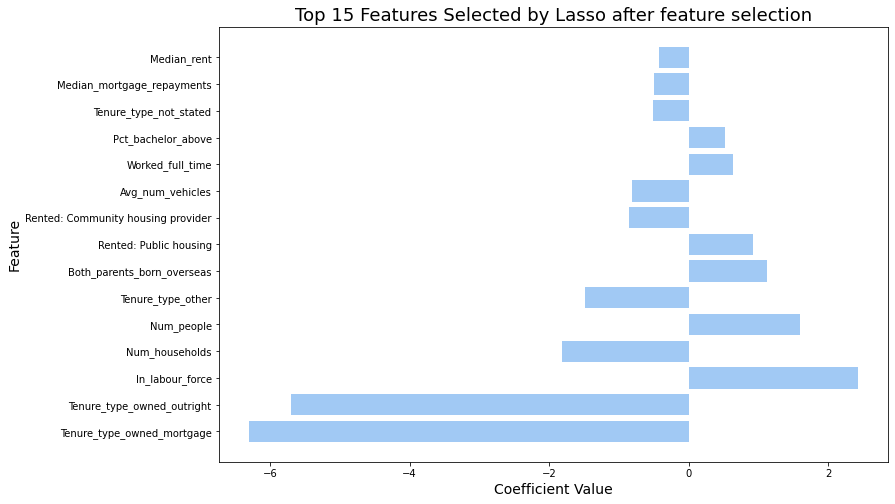

In [71]:

# Sort features by absolute coefficient values and select top 15
top_features = selected_features.iloc[selected_features['Coefficient-Abs'].abs().argsort()[::-1][:15]]

# Plot bar chart of top 15 features
plt.figure(figsize=(12,8))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.title('Top 15 Features Selected by Lasso after feature selection', fontsize=18)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


In [61]:
# Calculate p-values and confidence intervals by bootstrapping

# Instance Lasso model
lasso = Lasso(alpha=0.005)

# Fit the Lasso model to the data
lasso.fit(X_train_r, y_train)

# Define the number of bootstrap samples to use
n_bootstrap = 50

# Define an empty array to store the coefficients
coeffs = np.zeros((n_bootstrap, len(feature_names)))

# Perform the bootstrap resampling
for i in range(n_bootstrap):
    X_boot, y_boot = resample(X_train_r, y_train)
    lasso.fit(X_boot, y_boot)
    coeffs[i, :] = lasso.coef_

# Compute the mean and standard error of the coefficients
mean_coeffs = np.mean(coeffs, axis=0)
se_coeffs = np.std(coeffs, axis=0)

# Compute the t-statistic and p-values
t_stat = mean_coeffs / se_coeffs
p_values = 2 * (1 - norm.cdf(np.abs(t_stat)))

# Compute the confidence intervals (95% Confidence)
lower_ci = mean_coeffs - 1.96 * se_coeffs
upper_ci = mean_coeffs + 1.96 * se_coeffs

# Combine the results into a dataframe
result_df_fe = pd.DataFrame({
    "Feature": feature_names,
    "Absolute Coefficients": mean_coeffs,
    "Coefficient": mean_coeffs,
    "p-value": p_values,
    "Lower CI": lower_ci,
    "Upper CI": upper_ci
})

# Print the results for p-values less than 0.025 (two-tailed)
display(result_df_fe[result_df_fe["p-value"]<0.025].sort_values(by="Absolute Coefficients").reset_index().drop("index",axis=1))


,Feature,Absolute Coefficients,Coefficient,p-value,Lower CI,Upper CI
0,Tenure_type_owned_mortgage,-6.297276,-6.297276,0.000000e+00,-6.462223,-6.132329
1,Tenure_type_owned_outright,-5.702616,-5.702616,0.000000e+00,-5.873708,-5.531524
2,Num_households,-1.829484,-1.829484,0.000000e+00,-2.093721,-1.565248
3,Tenure_type_other,-1.473085,-1.473085,0.000000e+00,-1.573178,-1.372991
4,Rented: Community housing provider,-0.852843,-0.852843,0.000000e+00,-1.015593,-0.690094
5,Avg_num_vehicles,-0.802576,-0.802576,0.000000e+00,-0.939613,-0.665538
6,Tenure_type_not_stated,-0.506337,-0.506337,0.000000e+00,-0.610912,-0.401762
7,Median_mortgage_repayments,-0.495804,-0.495804,1.523359e-11,-0.639864,-0.351745
8,Median_rent,-0.417293,-0.417293,0.000000e+00,-0.505504,-0.329083
9,Year_12,-0.379237,-0.379237,1.468983e-05,-0.550771,-0.207704


## XGBoosting without tenure type rented

In [74]:
# Dictionary of hyperparameters for XGBRegressor, to reduce overfitting, with an amended performance metric
grid = {"n_estimators": [300],
        "max_depth": [4, 6],
        "learning_rate": [0.05],
        "subsample": [0.6],
        "gamma": [0.1]}

# Fit model using the function
model_cv(model=XGBRegressor(), search_type = "grid", hyperparameter_grid=grid,  
                        X_train=X_train_r, y_train=y_train, X_test=X_test_r, y_test=y_test)


 Best Parameters:  {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6} 
 
 Training MSE:  4.1307 
 
 Testing MSE:  9.9217


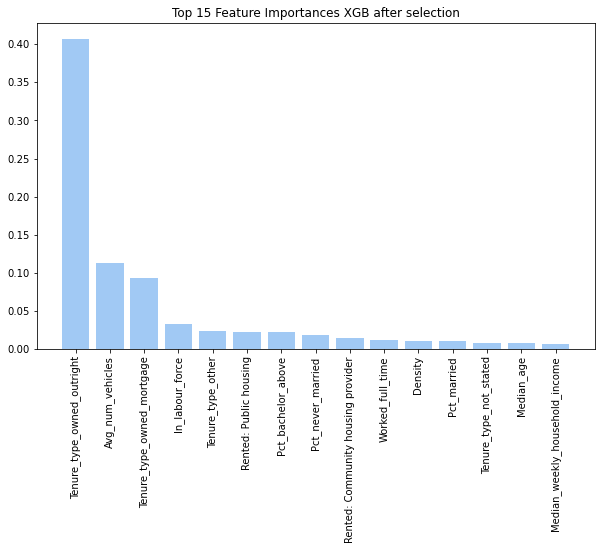

In [124]:

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.6, gamma=0.1)
xgb_model.fit(X_new, y)

# Compute feature importances
importances = xgb_model.feature_importances_

# Get the indices of the top 15 features
indices = np.argsort(importances)[::-1][:15]

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances XGB after selection")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), raid.columns[indices], rotation=90)
plt.show()


In [125]:
#  top 15 predictors and their importances as a dataframe
top_15_predictors = pd.DataFrame({'Feature': raid.columns[indices], 'Importance': importances[indices]})

# Add a title to the DataFrame
print("\n", "Top 15 Predictors and Their Importances","\n", "XGBoosting after feature selection without tenure type rented")

# Display the top 15 predictors
display(top_15_predictors)


 Top 15 Predictors and Their Importances 
 XGBoosting after feature selection without tenure type rented


,Feature,Importance
0,Tenure_type_owned_outright,0.407200
1,Avg_num_vehicles,0.113127
2,Tenure_type_owned_mortgage,0.093266
3,In_labour_force,0.033198
4,Tenure_type_other,0.024253
5,Rented: Public housing,0.022919
6,Pct_bachelor_above,0.022794
7,Pct_never_married,0.018600
8,Rented: Community housing provider,0.014392
9,Worked_full_time,0.012141


<hr> End of project